Load Libraries: We'll need to import pandas for data handling and os for navigating the file system.
Read Files: We will loop through the directory containing the CSV files, read each one, and modify the data accordingly.
Modify Data: Add a new column that captures the location extracted from the filename.

In [292]:
import pandas as pd
import os

# Define the directory containing the CSV files
directory_path = '../dataset'

# List to hold all the dataframes
dataframes = []

# Loop through all files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        # Create the full path to the file
        file_path = os.path.join(directory_path, filename)
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Extract location name by splitting on " 2014-" which is part of the date pattern in the filename
        location = filename.split(' 2014-')[0]
        
        # Add a new column for the location
        df['Location'] = location
        
        # Append the dataframe to the list
        dataframes.append(df)

# Optional: Combine all dataframes into a single dataframe if necessary
combined_df = pd.concat(dataframes, ignore_index=True)

# Show the combined dataframe
print(combined_df.head())


     datetime  temp  humidity  precipcover preciptype  windspeed  \
0  2014-01-01   3.2      58.0         0.00        NaN       15.6   
1  2014-01-02   2.0      82.6        29.17  rain,snow       17.6   
2  2014-01-03  -5.4      54.4        12.50  rain,snow       47.9   
3  2014-01-04  -3.8      53.2         0.00        NaN       20.9   
4  2014-01-05   2.8      79.1        20.83  rain,snow       17.0   

   sealevelpressure  cloudcover  solarradiation  solarenergy  ...  \
0            1027.0        66.2           117.6         10.2  ...   
1            1011.9        95.1            34.1          2.9  ...   
2            1021.9        39.5           126.7         10.9  ...   
3            1030.9        16.1           125.7         10.9  ...   
4            1020.0        97.5            24.0          1.9  ...   

   windspeed100  winddir100  ghiradiation  dniradiation  difradiation  \
0           0.0         NaN           NaN           NaN           NaN   
1           0.0         NaN   

In [293]:
combined_df.columns

Index(['datetime', 'temp', 'humidity', 'precipcover', 'preciptype',
       'windspeed', 'sealevelpressure', 'cloudcover', 'solarradiation',
       'solarenergy', 'soiltemp01', 'soiltemp04', 'soiltemp10', 'soiltemp20',
       'soilmoisture01', 'soilmoisture04', 'soilmoisture10', 'soilmoisture20',
       'windspeed50', 'winddir50', 'windspeed80', 'winddir80', 'windspeed100',
       'winddir100', 'ghiradiation', 'dniradiation', 'difradiation',
       'gtiradiation', 'sunelevation', 'Location', 'DATE', 'IY111'],
      dtype='object')

In [294]:
import pandas as pd

# Assuming 'combined_df' is your DataFrame
# Display the number of missing values in each column
missing_values_count = combined_df.isnull().sum()
print("Missing values in each column:")
print(missing_values_count)


Missing values in each column:
datetime              220
temp                  220
humidity              220
precipcover           220
preciptype          20379
windspeed             220
sealevelpressure      220
cloudcover            220
solarradiation        220
solarenergy           220
soiltemp01           3882
soiltemp04           3882
soiltemp10           3882
soiltemp20           3882
soilmoisture01       3882
soilmoisture04       3882
soilmoisture10       3882
soilmoisture20       3882
windspeed50           220
winddir50            3860
windspeed80           220
winddir80            3860
windspeed100          220
winddir100           3860
ghiradiation         3860
dniradiation         3860
difradiation         3860
gtiradiation         3860
sunelevation          220
Location                0
DATE                36530
IY111               36530
dtype: int64


Based on the result of the missing value analysis, we'll proceed with the following steps:

Remove the preciptype column: Since this column has a substantial number of missing values and may not be critical for analyzing the impact of solar radiation on soil conditions.
Remove rows with missing values in the soil and wind-related columns: Given the significant count of missing values in soiltemp01, soiltemp04, soiltemp10, soiltemp20, soilmoisture01, soilmoisture04, soilmoisture10, soilmoisture20, winddir50, winddir80, winddir100, and gtiradiation, it's prudent to remove rows where any of these columns are missing to maintain data integrity for your analysis.

In [295]:
import pandas as pd

# Assuming 'combined_df' is your DataFrame

# Remove 'preciptype' column
combined_df.drop('preciptype', axis=1, inplace=True)

# Define columns where NaN rows should be removed
columns_with_nan = ['soiltemp01', 'soiltemp04', 'soiltemp10', 'soiltemp20',
                    'soilmoisture01', 'soilmoisture04', 'soilmoisture10', 'soilmoisture20',
                    'winddir50', 'winddir80', 'winddir100', 'gtiradiation']

# Remove rows with NaN in any of the specified columns
combined_df.dropna(subset=columns_with_nan, inplace=True)

# Optionally, check the remaining missing values (if any)
remaining_missing_values = combined_df.isnull().sum()
print("Remaining missing values in each column:")
print(remaining_missing_values)

# Show the first few rows of the updated DataFrame
print(combined_df.head())


Remaining missing values in each column:
datetime                0
temp                    0
humidity                0
precipcover             0
windspeed               0
sealevelpressure        0
cloudcover              0
solarradiation          0
solarenergy             0
soiltemp01              0
soiltemp04              0
soiltemp10              0
soiltemp20              0
soilmoisture01          0
soilmoisture04          0
soilmoisture10          0
soilmoisture20          0
windspeed50             0
winddir50               0
windspeed80             0
winddir80               0
windspeed100            0
winddir100              0
ghiradiation            0
dniradiation            0
difradiation            0
gtiradiation            0
sunelevation            0
Location                0
DATE                32868
IY111               32868
dtype: int64
       datetime  temp  humidity  precipcover  windspeed  sealevelpressure  \
364  2014-12-31   0.5      44.6         0.00       20.3        

In [296]:
combined_df.head()

,datetime,temp,humidity,precipcover,windspeed,sealevelpressure,cloudcover,solarradiation,solarenergy,soiltemp01,...,windspeed100,winddir100,ghiradiation,dniradiation,difradiation,gtiradiation,sunelevation,Location,DATE,IY111
364,2014-12-31,0.5,44.6,0.00,20.3,1028.9,33.9,120.0,10.4,0.4,...,18.0,228.6,0.0,0.0,0.0,0.0,28.0,Arlington,NaN,NaN
365,2015-01-01,2.1,46.0,0.00,22.6,1021.7,36.5,116.2,10.0,0.4,...,31.3,229.4,116.0,92.0,81.0,116.0,28.1,Arlington,NaN,NaN
366,2015-01-02,4.8,53.0,0.00,14.2,1025.6,76.6,93.0,8.0,2.4,...,24.5,287.9,93.0,54.0,72.0,93.0,28.2,Arlington,NaN,NaN
367,2015-01-03,3.8,78.3,50.00,10.2,1029.1,94.5,13.6,1.2,1.3,...,20.9,99.9,14.0,0.0,6.0,6.0,28.3,Arlington,NaN,NaN
368,2015-01-04,11.7,78.2,41.67,32.4,1012.6,94.7,18.7,1.6,5.6,...,45.7,225.9,19.0,0.0,12.0,12.0,28.4,Arlington,NaN,NaN


In [297]:
df = combined_df.copy()

In [298]:
df.head()

,datetime,temp,humidity,precipcover,windspeed,sealevelpressure,cloudcover,solarradiation,solarenergy,soiltemp01,...,windspeed100,winddir100,ghiradiation,dniradiation,difradiation,gtiradiation,sunelevation,Location,DATE,IY111
364,2014-12-31,0.5,44.6,0.00,20.3,1028.9,33.9,120.0,10.4,0.4,...,18.0,228.6,0.0,0.0,0.0,0.0,28.0,Arlington,NaN,NaN
365,2015-01-01,2.1,46.0,0.00,22.6,1021.7,36.5,116.2,10.0,0.4,...,31.3,229.4,116.0,92.0,81.0,116.0,28.1,Arlington,NaN,NaN
366,2015-01-02,4.8,53.0,0.00,14.2,1025.6,76.6,93.0,8.0,2.4,...,24.5,287.9,93.0,54.0,72.0,93.0,28.2,Arlington,NaN,NaN
367,2015-01-03,3.8,78.3,50.00,10.2,1029.1,94.5,13.6,1.2,1.3,...,20.9,99.9,14.0,0.0,6.0,6.0,28.3,Arlington,NaN,NaN
368,2015-01-04,11.7,78.2,41.67,32.4,1012.6,94.7,18.7,1.6,5.6,...,45.7,225.9,19.0,0.0,12.0,12.0,28.4,Arlington,NaN,NaN


In [299]:
df.columns

Index(['datetime', 'temp', 'humidity', 'precipcover', 'windspeed',
       'sealevelpressure', 'cloudcover', 'solarradiation', 'solarenergy',
       'soiltemp01', 'soiltemp04', 'soiltemp10', 'soiltemp20',
       'soilmoisture01', 'soilmoisture04', 'soilmoisture10', 'soilmoisture20',
       'windspeed50', 'winddir50', 'windspeed80', 'winddir80', 'windspeed100',
       'winddir100', 'ghiradiation', 'dniradiation', 'difradiation',
       'gtiradiation', 'sunelevation', 'Location', 'DATE', 'IY111'],
      dtype='object')

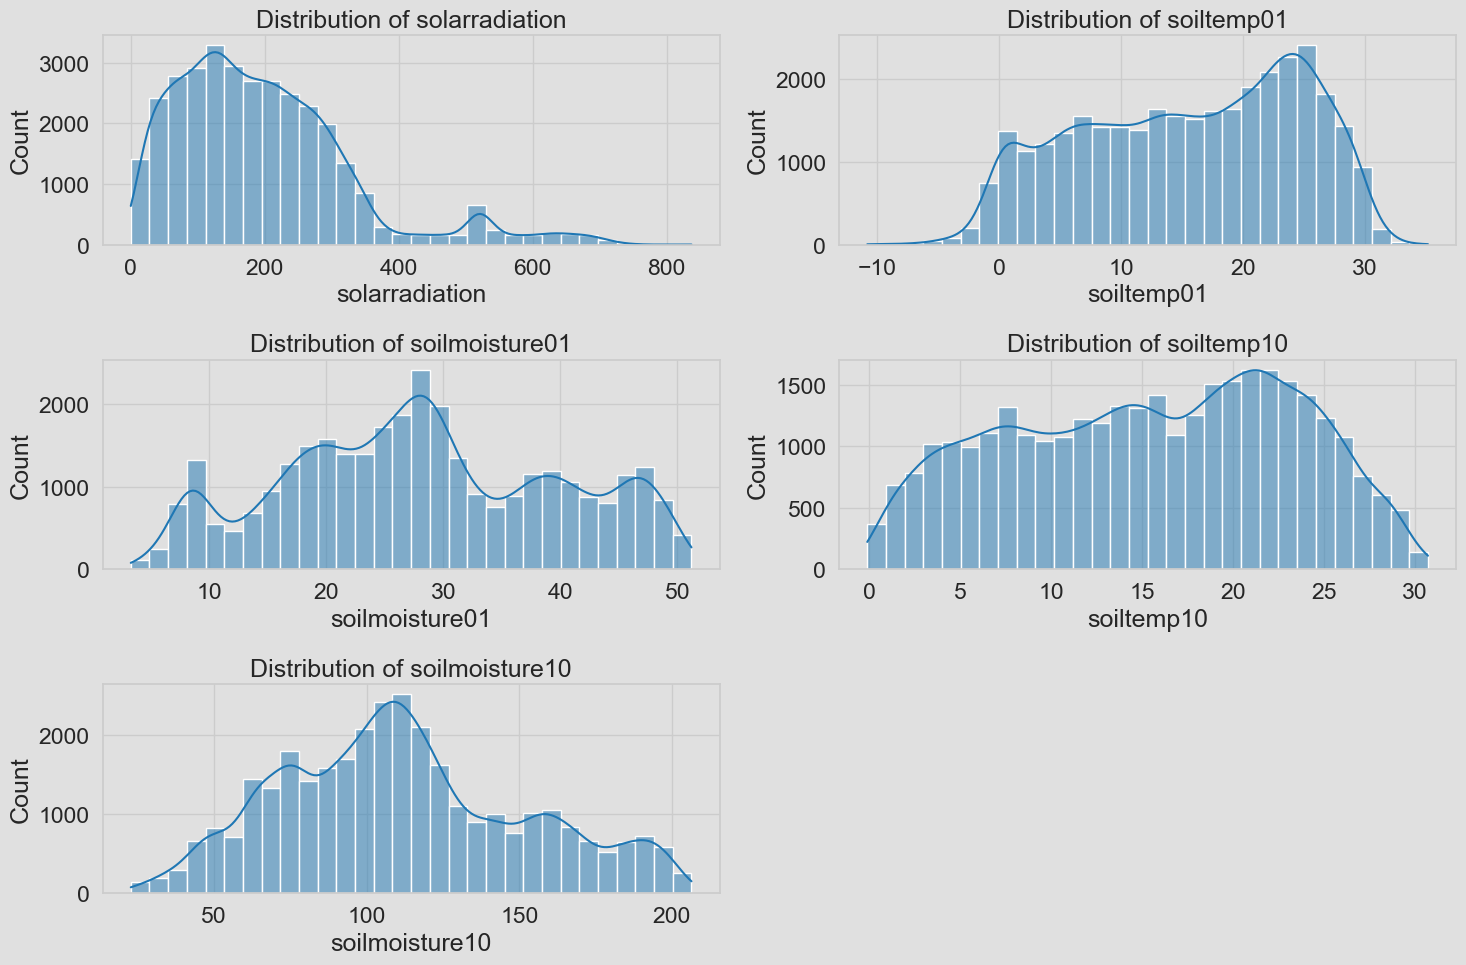

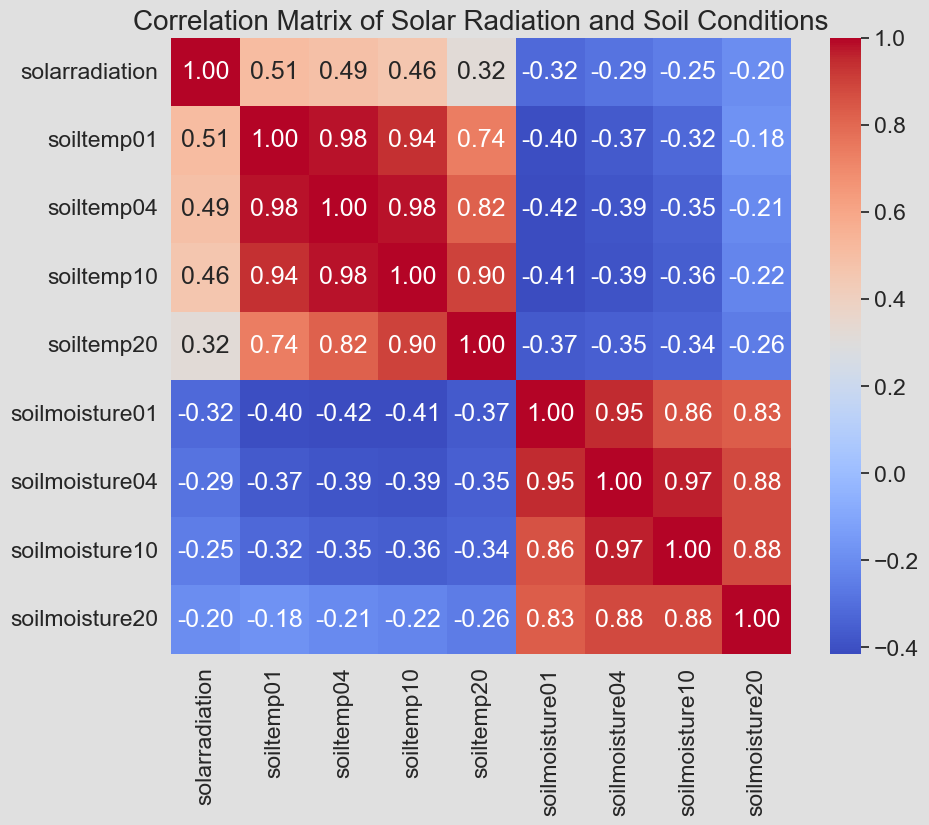

[codecarbon INFO @ 18:50:59] Energy consumed for RAM : 0.014635 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 18:50:59] Energy consumed for all GPUs : 0.041581 kWh. Total GPU Power : 15.675855815444995 W
[codecarbon INFO @ 18:50:59] Energy consumed for all CPUs : 0.057023 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 18:50:59] 0.113238 kWh of electricity used since the beginning.
[codecarbon INFO @ 18:51:14] Energy consumed for RAM : 0.014659 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 18:51:14] Energy consumed for all GPUs : 0.041646 kWh. Total GPU Power : 15.812019284843906 W
[codecarbon INFO @ 18:51:14] Energy consumed for all CPUs : 0.057116 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 18:51:14] 0.113421 kWh of electricity used since the beginning.
[codecarbon INFO @ 18:51:29] Energy consumed for RAM : 0.014683 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 18:51:29] Energy consumed for all GPUs : 0.041712 kWh. Total GPU Power : 15.862356660379

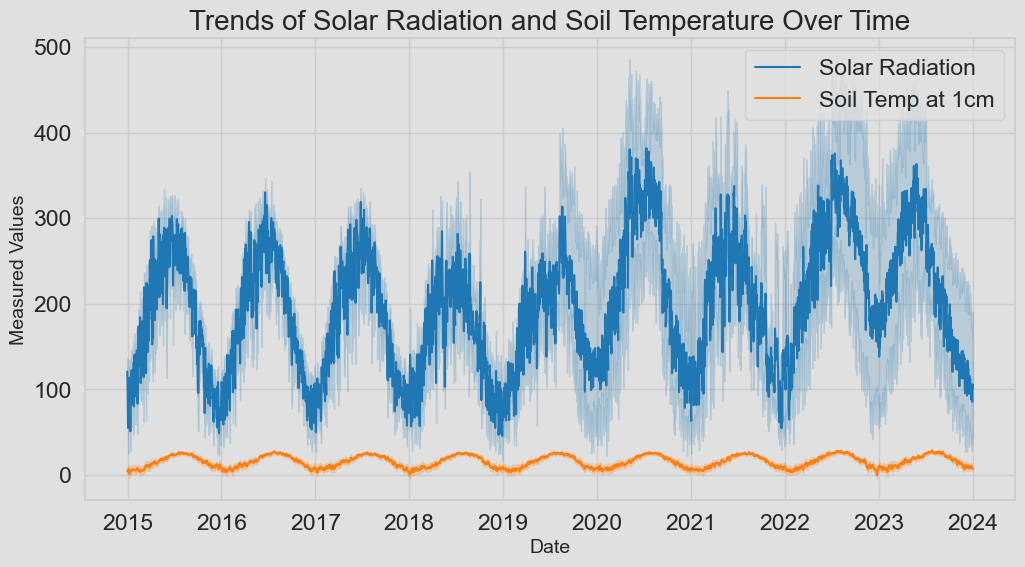

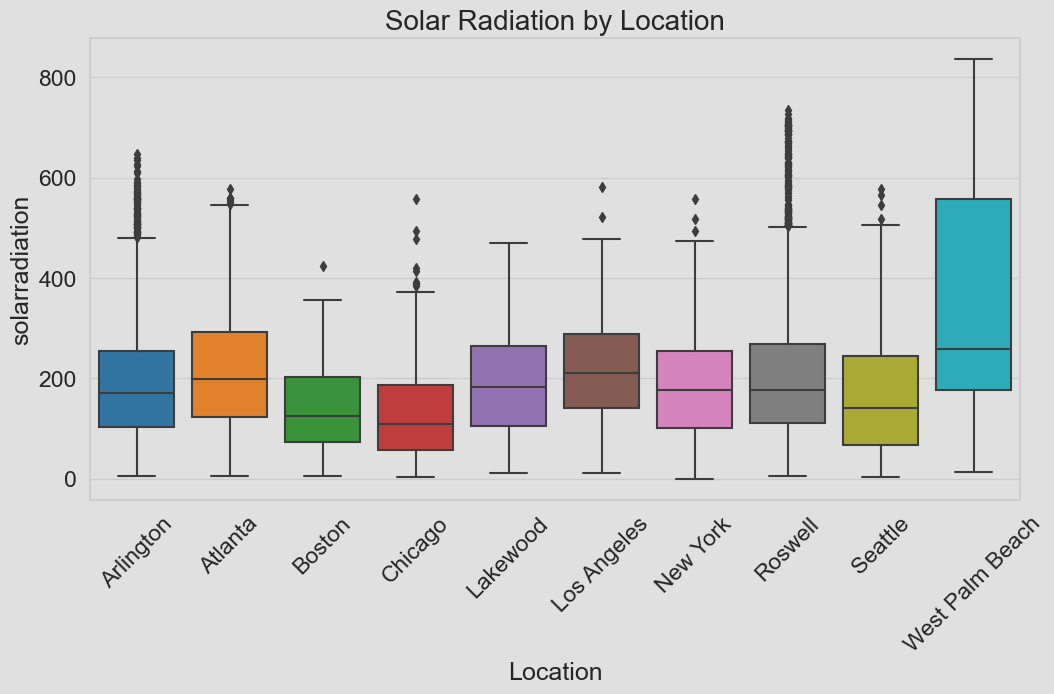

In [300]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid", {'axes.facecolor': '#E0E0E0', 'figure.facecolor': '#E0E0E0'})
sns.set_context("notebook", font_scale=1.5)  # Increase font scale for better readability

# Convert 'datetime' from string to datetime type if not already
df['datetime'] = pd.to_datetime(df['datetime'])

# 1. Visualize Distribution of Key Variables
variables_to_plot = ['solarradiation', 'soiltemp01', 'soilmoisture01', 'soiltemp10', 'soilmoisture10']
plt.figure(figsize=(15, 10), facecolor='#E0E0E0', edgecolor='#E0E0E0')
for i, var in enumerate(variables_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Distribution of {var}', fontsize=18)
plt.tight_layout()
plt.savefig('../image/distribution_of_key_variables.png', dpi=300)  # Save with high DPI
plt.show()

# 2. Correlation Analysis
correlation_vars = ['solarradiation', 'soiltemp01', 'soiltemp04', 'soiltemp10', 'soiltemp20', 'soilmoisture01', 'soilmoisture04', 'soilmoisture10', 'soilmoisture20']
correlation_matrix = df[correlation_vars].corr()
plt.figure(figsize=(10, 8), facecolor='#E0E0E0', edgecolor='#E0E0E0')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Solar Radiation and Soil Conditions', fontsize=20)
plt.savefig('../image/correlation_matrix.png', dpi=300)  # Save with high DPI
plt.show()

# 3. Trend Analysis Over Time
plt.figure(figsize=(12, 6), facecolor='#E0E0E0', edgecolor='#E0E0E0')
sns.lineplot(x='datetime', y='solarradiation', data=df, label='Solar Radiation')
sns.lineplot(x='datetime', y='soiltemp01', data=df, label='Soil Temp at 1cm')
plt.title('Trends of Solar Radiation and Soil Temperature Over Time', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Measured Values', fontsize=14)
plt.legend()
plt.savefig('../image/trend_analysis_over_time.png', dpi=300)  # Save with high DPI
plt.show()

# 4. Comparative Analysis by Location
plt.figure(figsize=(12, 6), facecolor='#E0E0E0', edgecolor='#E0E0E0')
sns.boxplot(x='Location', y='solarradiation', data=df)
plt.xticks(rotation=45)
plt.title('Solar Radiation by Location', fontsize=20)
plt.savefig('../image/solar_radiation_by_location.png', dpi=300)  # Save with high DPI
plt.show()


Modeling 

In [301]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your data
# df = pd.read_csv('your_data.csv')  # Load data if not already loaded

# Convert 'datetime' from string to datetime type if not already
df['datetime'] = pd.to_datetime(df['datetime'])

# Select relevant features
features = ['solarradiation', 'solarenergy', 'ghiradiation', 'dniradiation', 'difradiation', 'gtiradiation']
targets = ['soiltemp01', 'soiltemp04', 'soiltemp10', 'soiltemp20', 'soilmoisture01', 'soilmoisture04', 'soilmoisture10', 'soilmoisture20']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[targets], test_size=0.2, random_state=42)


Step 2: Building the Machine Learning Models
We will build two models: a Random Forest regressor and a Gradient Boosting Machine model. These models will predict soil temperature and moisture.

In [302]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from codecarbon import EmissionsTracker

# Initialize the carbon emissions tracker
tracker = EmissionsTracker()

# Start tracking
tracker.start()

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Stop tracking and collect emissions data
emissions = tracker.stop()
print(f"Estimated CO2 emissions for training RandomForest: {emissions} kg")

rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f'Random Forest MSE: {rf_mse}')


[codecarbon INFO @ 18:52:20] [setup] RAM Tracking...
[codecarbon INFO @ 18:52:20] [setup] GPU Tracking...
[codecarbon INFO @ 18:52:20] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 18:52:20] [setup] CPU Tracking...
[codecarbon WARNING @ 18:52:20] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 18:52:21] CPU Model on constant consumption mode: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 18:52:21] >>> Tracker's metadata:
[codecarbon INFO @ 18:52:21]   Platform system: Windows-10-10.0.22631-SP0
[codecarbon INFO @ 18:52:21]   Python version: 3.9.13
[codecarbon INFO @ 18:52:21]   CodeCarbon version: 2.3.5
[codecarbon INFO @ 18:52:21]   Available RAM : 15.405 GB
[codecarbon INFO @ 18:52:21]   CPU count: 16
[codecarbon INFO @ 18:52:21]   CPU model: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 18:52:21]   GPU count: 1
[codecarbon INFO @ 18:52:21]   GPU model: 1 x NVIDIA GeForce RTX 3070 Laptop GPU
[codecarbon INFO @ 18:52:29] E

Estimated CO2 emissions for training RandomForest: 5.387022481346185e-05 kg
Random Forest MSE: 1363.8636969539036


use a wrapper called MultiOutputRegressor that enables single-target regressors like GradientBoostingRegressor to be used as multi-target regressors. 

In [303]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
from codecarbon import EmissionsTracker

# Initialize the carbon emissions tracker
tracker = EmissionsTracker()

# Start tracking
tracker.start()

# Gradient Boosting Machine Model with MultiOutput Wrapper
gbm_model = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=100, random_state=42))
gbm_model.fit(X_train, y_train)

# Stop tracking and collect emissions data
emissions = tracker.stop()
print(f"Estimated CO2 emissions for training GBM: {emissions} kg")

gbm_predictions = gbm_model.predict(X_test)
gbm_mse = mean_squared_error(y_test, gbm_predictions)
print(f'Gradient Boosting MSE: {gbm_mse}')


[codecarbon INFO @ 18:52:36] [setup] RAM Tracking...
[codecarbon INFO @ 18:52:36] [setup] GPU Tracking...
[codecarbon INFO @ 18:52:36] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 18:52:36] [setup] CPU Tracking...
[codecarbon WARNING @ 18:52:36] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 18:52:38] CPU Model on constant consumption mode: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 18:52:38] >>> Tracker's metadata:
[codecarbon INFO @ 18:52:38]   Platform system: Windows-10-10.0.22631-SP0
[codecarbon INFO @ 18:52:38]   Python version: 3.9.13
[codecarbon INFO @ 18:52:38]   CodeCarbon version: 2.3.5
[codecarbon INFO @ 18:52:38]   Available RAM : 15.405 GB
[codecarbon INFO @ 18:52:38]   CPU count: 16
[codecarbon INFO @ 18:52:38]   CPU model: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 18:52:38]   GPU count: 1
[codecarbon INFO @ 18:52:38]   GPU model: 1 x NVIDIA GeForce RTX 3070 Laptop GPU
[codecarbon INFO @ 18:52:44] E

Estimated CO2 emissions for training GBM: 7.922866041650303e-05 kg
Gradient Boosting MSE: 1353.2953213557662


In [305]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Random Forest Metrics
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_predictions)
print(f'Random Forest MSE: {rf_mse}')
print(f'Random Forest RMSE: {rf_rmse}')
print(f'Random Forest MAE: {rf_mae}')

# Gradient Boosting Metrics
gbm_mse = mean_squared_error(y_test, gbm_predictions)
gbm_rmse = np.sqrt(gbm_mse)
gbm_mae = mean_absolute_error(y_test, gbm_predictions)
print(f'Gradient Boosting MSE: {gbm_mse}')
print(f'Gradient Boosting RMSE: {gbm_rmse}')
print(f'Gradient Boosting MAE: {gbm_mae}')


Random Forest MSE: 1363.8636969539036
Random Forest RMSE: 36.930525273192416
Random Forest MAE: 19.019004749454922
Gradient Boosting MSE: 1353.2953213557662
Gradient Boosting RMSE: 36.7871624531679
Gradient Boosting MAE: 19.62670304865015


[codecarbon INFO @ 18:54:29] Energy consumed for RAM : 0.014971 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 18:54:29] Energy consumed for all GPUs : 0.042527 kWh. Total GPU Power : 15.385000101279681 W
[codecarbon INFO @ 18:54:29] Energy consumed for all CPUs : 0.058334 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 18:54:29] 0.115832 kWh of electricity used since the beginning.


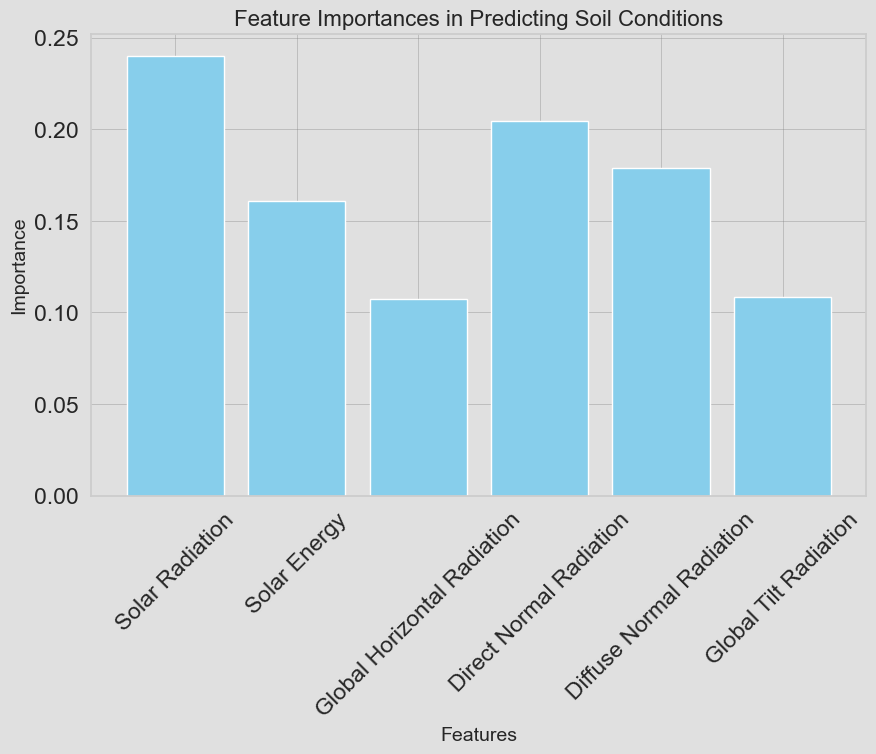

In [306]:

feature_importances = rf_model.feature_importances_
features = [
    'Solar Radiation', 'Solar Energy', 'Global Horizontal Radiation',
    'Direct Normal Radiation', 'Diffuse Normal Radiation', 'Global Tilt Radiation'
]

# Configure plot aesthetics
plt.figure(figsize=(10, 6), facecolor='#E0E0E0')  # Set figure background color
plt.bar(features, feature_importances, color='skyblue')
plt.xlabel('Features', fontsize=14)  # Larger font size for x label
plt.ylabel('Importance', fontsize=14)  # Larger font size for y label
plt.title('Feature Importances in Predicting Soil Conditions', fontsize=16)  # Larger title font
plt.xticks(rotation=45)
plt.gca().set_facecolor('#E0E0E0')  # Set axes background color

# Add a grid for better readability
plt.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)  # Configure grid color and style

plt.savefig('../image/feature_importances.png', dpi=300, facecolor='#E0E0E0')  # Save with high DPI and specific background color
plt.show()


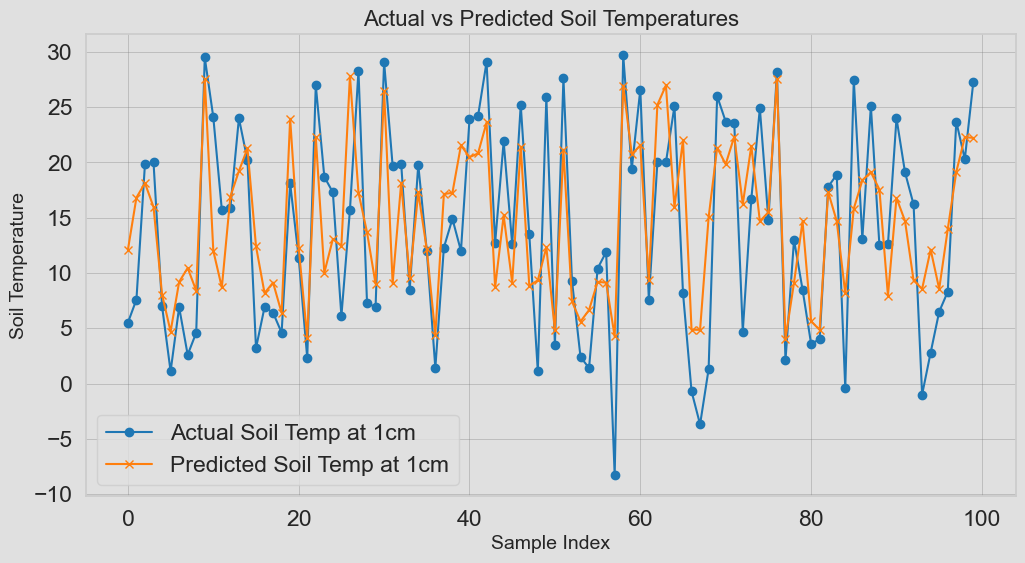

In [307]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6), facecolor='#E0E0E0')  # Set figure background color
plt.plot(y_test.reset_index(drop=True).iloc[:100, 0], label='Actual Soil Temp at 1cm', marker='o')
plt.plot(gbm_predictions[:100, 0], label='Predicted Soil Temp at 1cm', marker='x')
plt.xlabel('Sample Index', fontsize=14)  # Larger font size for x label
plt.ylabel('Soil Temperature', fontsize=14)  # Larger font size for y label
plt.title('Actual vs Predicted Soil Temperatures', fontsize=16)  # Larger title font
plt.legend()

# Set axes background color
plt.gca().set_facecolor('#E0E0E0')


# Add a grid for better readability
plt.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)  # Configure grid color and style

# Save the plot with high DPI and specific background color
plt.savefig('../image/actual_vs_predicted_soil_temps.png', dpi=300, facecolor='#E0E0E0')
plt.show()


In [308]:
from sklearn.metrics import mean_squared_error

locations = df['Location'].unique()
mse_scores = {}
features = ['solarradiation', 'solarenergy', 'ghiradiation', 'dniradiation', 'difradiation', 'gtiradiation']
for location in locations:
    # Filter data by location
    location_data = df[df['Location'] == location]
    X_location = location_data[features]
    y_location = location_data[targets]

    # Split location-specific data
    X_train_loc, X_test_loc, y_train_loc, y_test_loc = train_test_split(X_location, y_location, test_size=0.2, random_state=42)

    # Fit model (you can use an already tuned model or refit if necessary)
    rf_model.fit(X_train_loc, y_train_loc)
    predictions_loc = rf_model.predict(X_test_loc)

    # Calculate MSE for the location
    mse_scores[location] = mean_squared_error(y_test_loc, predictions_loc)


[codecarbon INFO @ 18:54:44] Energy consumed for RAM : 0.014995 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 18:54:44] Energy consumed for all GPUs : 0.042592 kWh. Total GPU Power : 15.779416145810131 W
[codecarbon INFO @ 18:54:44] Energy consumed for all CPUs : 0.058428 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 18:54:44] 0.116016 kWh of electricity used since the beginning.


[codecarbon INFO @ 18:54:59] Energy consumed for RAM : 0.015020 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 18:54:59] Energy consumed for all GPUs : 0.042660 kWh. Total GPU Power : 16.187116626613772 W
[codecarbon INFO @ 18:54:59] Energy consumed for all CPUs : 0.058521 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 18:55:00] 0.116201 kWh of electricity used since the beginning.


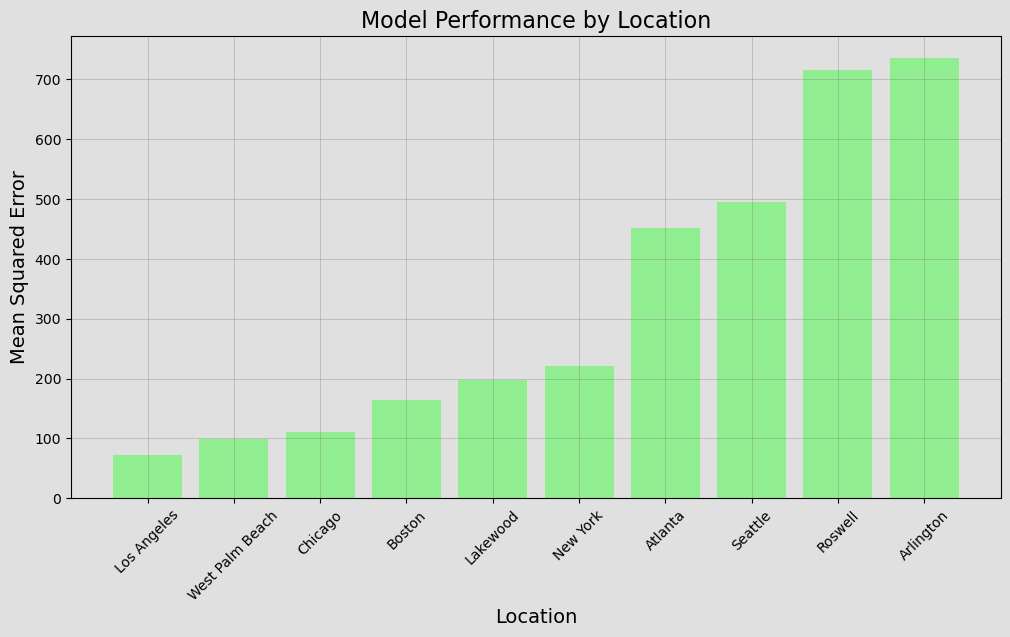

In [279]:
sorted_mse_scores = dict(sorted(mse_scores.items(), key=lambda item: item[1]))

plt.figure(figsize=(12, 6), facecolor='#E0E0E0', edgecolor='#E0E0E0')  # Set figure background and edge color
plt.bar(sorted_mse_scores.keys(), sorted_mse_scores.values(), color='lightgreen')
plt.xlabel('Location', fontsize=14)  # Larger font size for x label
plt.ylabel('Mean Squared Error', fontsize=14)  # Larger font size for y label
plt.title('Model Performance by Location', fontsize=16)  # Larger title font
plt.xticks(rotation=45)

# Set axes background color
plt.gca().set_facecolor('#E0E0E0')

# Add a grid for better readability
plt.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)  # Configure grid color and style

# Save the plot with high DPI and specific background color
plt.savefig('../image/model_performance_by_location.png', dpi=300, facecolor='#E0E0E0')
plt.show()


Classification

Step 1: Define the Classification Target
For demonstration, let's classify days based on high vs. low solar radiation, which could influence various factors in soil conditions. We’ll create a binary target where days with solar radiation above the median are labeled 1 (high) and below the median as 0 (low).

In [309]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assume df is your loaded DataFrame
# Create a binary target based on the median of 'solarradiation'
median_solar_radiation = df['solarradiation'].median()
df['high_solar_radiation'] = (df['solarradiation'] >= median_solar_radiation).astype(int)

# Select features - consider location and other relevant environmental features
features = ['temp', 'humidity', 'precipcover', 'cloudcover', 'windspeed', 'sealevelpressure', 'Location']
X = pd.get_dummies(df[features], drop_first=True)  # One-hot encode categorical data
y = df['high_solar_radiation']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


[codecarbon INFO @ 18:55:14] Energy consumed for RAM : 0.015044 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 18:55:14] Energy consumed for all GPUs : 0.042727 kWh. Total GPU Power : 16.136567747001713 W
[codecarbon INFO @ 18:55:14] Energy consumed for all CPUs : 0.058615 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 18:55:14] 0.116386 kWh of electricity used since the beginning.



Step 2: Train a Classification Model
Let’s use a Random Forest Classifier as it handles a mix of feature types and is robust to overfitting.

In [310]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from codecarbon import EmissionsTracker

# Initialize the carbon emissions tracker
tracker = EmissionsTracker()

# Start tracking
tracker.start()

# Train a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Stop tracking and collect emissions data
emissions = tracker.stop()
print(f"Estimated CO2 emissions for training Logistic Regression: {emissions} kg")

# Predict on the test set
lr_predictions = lr_model.predict(X_test)

# Evaluate the Logistic Regression model
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f'Logistic Regression Accuracy: {lr_accuracy}')
print(classification_report(y_test, lr_predictions))

# Confusion Matrix for Logistic Regression
lr_conf_matrix = confusion_matrix(y_test, lr_predictions)
print(f"Confusion Matrix for Logistic Regression:\n{lr_conf_matrix}")


[codecarbon INFO @ 18:55:16] [setup] RAM Tracking...
[codecarbon INFO @ 18:55:16] [setup] GPU Tracking...
[codecarbon INFO @ 18:55:16] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 18:55:16] [setup] CPU Tracking...
[codecarbon WARNING @ 18:55:16] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 18:55:18] CPU Model on constant consumption mode: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 18:55:18] >>> Tracker's metadata:
[codecarbon INFO @ 18:55:18]   Platform system: Windows-10-10.0.22631-SP0
[codecarbon INFO @ 18:55:18]   Python version: 3.9.13
[codecarbon INFO @ 18:55:18]   CodeCarbon version: 2.3.5
[codecarbon INFO @ 18:55:18]   Available RAM : 15.405 GB
[codecarbon INFO @ 18:55:18]   CPU count: 16
[codecarbon INFO @ 18:55:18]   CPU model: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 18:55:18]   GPU count: 1
[codecarbon INFO @ 18:55:18]   GPU model: 1 x NVIDIA GeForce RTX 3070 Laptop GPU
[codecarbon INFO @ 18:55:21] E

Estimated CO2 emissions for training Logistic Regression: 1.613785082668656e-06 kg
Logistic Regression Accuracy: 0.7725889869181625
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      3335
           1       0.76      0.79      0.77      3239

    accuracy                           0.77      6574
   macro avg       0.77      0.77      0.77      6574
weighted avg       0.77      0.77      0.77      6574

Confusion Matrix for Logistic Regression:
[[2505  830]
 [ 665 2574]]


In [311]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from codecarbon import EmissionsTracker

# Initialize the carbon emissions tracker
tracker = EmissionsTracker()

# Start tracking
tracker.start()

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Stop tracking and collect emissions data
emissions = tracker.stop()
print(f"Estimated CO2 emissions for training RandomForestClassifier: {emissions} kg")

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy}')
print(classification_report(y_test, rf_predictions))

# Confusion Matrix for Random Forest
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
print(f"Confusion Matrix for Random Forest:\n{rf_conf_matrix}")


[codecarbon INFO @ 18:55:25] [setup] RAM Tracking...
[codecarbon INFO @ 18:55:25] [setup] GPU Tracking...
[codecarbon INFO @ 18:55:25] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 18:55:25] [setup] CPU Tracking...
[codecarbon WARNING @ 18:55:25] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 18:55:27] CPU Model on constant consumption mode: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 18:55:27] >>> Tracker's metadata:
[codecarbon INFO @ 18:55:27]   Platform system: Windows-10-10.0.22631-SP0
[codecarbon INFO @ 18:55:27]   Python version: 3.9.13
[codecarbon INFO @ 18:55:27]   CodeCarbon version: 2.3.5
[codecarbon INFO @ 18:55:27]   Available RAM : 15.405 GB
[codecarbon INFO @ 18:55:27]   CPU count: 16
[codecarbon INFO @ 18:55:27]   CPU model: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 18:55:27]   GPU count: 1
[codecarbon INFO @ 18:55:27]   GPU model: 1 x NVIDIA GeForce RTX 3070 Laptop GPU
[codecarbon INFO @ 18:55:29] E

Estimated CO2 emissions for training RandomForestClassifier: 1.1778508975569944e-05 kg
Random Forest Accuracy: 0.7920596288408883
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      3335
           1       0.79      0.78      0.79      3239

    accuracy                           0.79      6574
   macro avg       0.79      0.79      0.79      6574
weighted avg       0.79      0.79      0.79      6574

Confusion Matrix for Random Forest:
[[2667  668]
 [ 699 2540]]


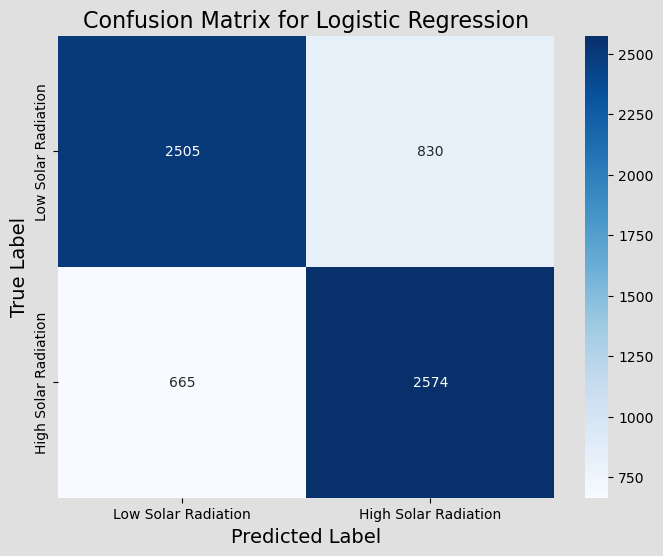

[codecarbon INFO @ 17:51:27] Energy consumed for RAM : 0.008906 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 17:51:27] Energy consumed for all GPUs : 0.025998 kWh. Total GPU Power : 15.866500428689264 W
[codecarbon INFO @ 17:51:27] Energy consumed for all CPUs : 0.034700 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 17:51:27] 0.069604 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:51:42] Energy consumed for RAM : 0.008930 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 17:51:42] Energy consumed for all GPUs : 0.026065 kWh. Total GPU Power : 15.927968015106039 W
[codecarbon INFO @ 17:51:42] Energy consumed for all CPUs : 0.034794 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 17:51:42] 0.069789 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:51:57] Energy consumed for RAM : 0.008954 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 17:51:57] Energy consumed for all GPUs : 0.026132 kWh. Total GPU Power : 16.171061025350

In [285]:
lr_conf_matrix = confusion_matrix(y_test, lr_predictions)

plt.figure(figsize=(8, 6), facecolor='#E0E0E0', edgecolor='#E0E0E0')  # Set figure background and edge color
ax = sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='Blues',
                 xticklabels=['Low Solar Radiation', 'High Solar Radiation'],
                 yticklabels=['Low Solar Radiation', 'High Solar Radiation'])
plt.xlabel('Predicted Label', fontsize=14)  # Larger font size for x label
plt.ylabel('True Label', fontsize=14)  # Larger font size for y label
plt.title('Confusion Matrix for Logistic Regression', fontsize=16)  # Larger title font

# Set axes background color, but it won't affect heatmap
plt.gca().set_facecolor('#E0E0E0')

# Save the plot with high DPI and specific background color
plt.savefig('../image/logistic_regression_confusion_matrix.png', dpi=300, facecolor='#E0E0E0')
plt.show()


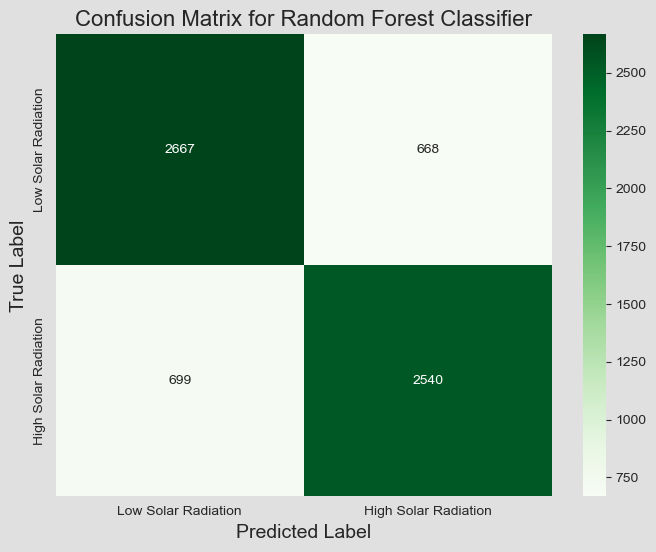

[codecarbon INFO @ 17:52:58] Energy consumed for RAM : 0.009050 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 17:52:58] Energy consumed for all GPUs : 0.026404 kWh. Total GPU Power : 16.206021925963118 W
[codecarbon INFO @ 17:52:58] Energy consumed for all CPUs : 0.035263 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 17:52:58] 0.070717 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:53:13] Energy consumed for RAM : 0.009074 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 17:53:13] Energy consumed for all GPUs : 0.026469 kWh. Total GPU Power : 15.685699687383277 W
[codecarbon INFO @ 17:53:13] Energy consumed for all CPUs : 0.035357 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 17:53:13] 0.070900 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:53:28] Energy consumed for RAM : 0.009098 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 17:53:28] Energy consumed for all GPUs : 0.026535 kWh. Total GPU Power : 15.643713525582

In [287]:
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)

plt.figure(figsize=(8, 6), facecolor='#E0E0E0', edgecolor='#E0E0E0')  # Set figure background and edge color
ax = sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Greens',
                 xticklabels=['Low Solar Radiation', 'High Solar Radiation'],
                 yticklabels=['Low Solar Radiation', 'High Solar Radiation'])
plt.xlabel('Predicted Label', fontsize=14)  # Larger font size for x label
plt.ylabel('True Label', fontsize=14)  # Larger font size for y label
plt.title('Confusion Matrix for Random Forest Classifier', fontsize=16)  # Larger title font

# Set axes background color, but it won't affect heatmap
plt.gca().set_facecolor('#E0E0E0')

# Save the plot with high DPI and specific background color
plt.savefig('../image/random_forest_confusion_matrix.png', dpi=300, facecolor='#E0E0E0')
plt.show()


Estimated CO2 emissions for training RandomForestClassifier: 6.7945618182298664e-06 kg
Random Forest Accuracy: 0.7920596288408883

Estimated CO2 emissions for training Logistic Regression: 7.585821643039916e-07 kg
Logistic Regression Accuracy: 0.7725889869181625

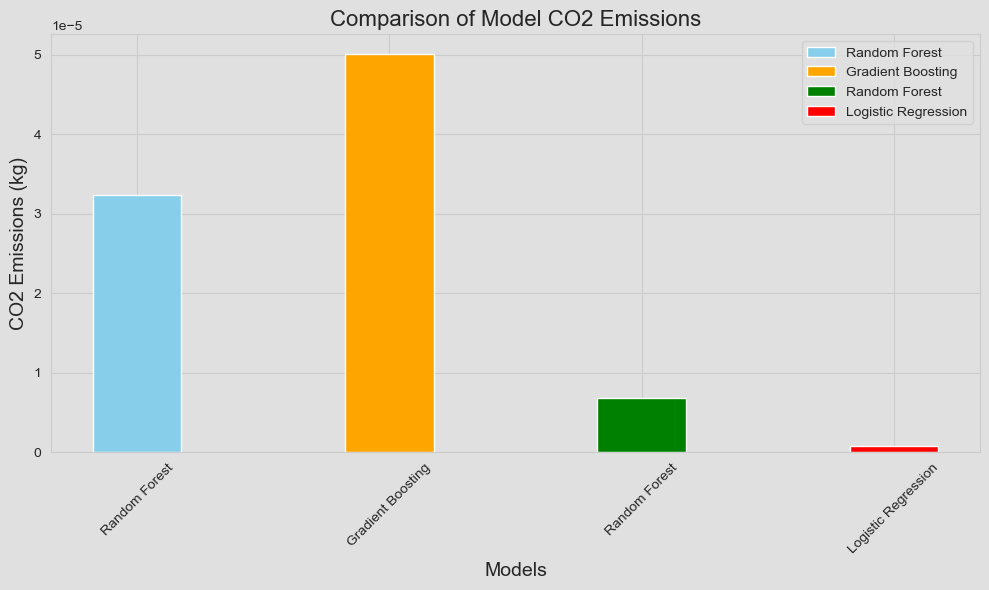

[codecarbon INFO @ 17:56:43] Energy consumed for RAM : 0.009411 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 17:56:43] Energy consumed for all GPUs : 0.027381 kWh. Total GPU Power : 15.936535125190547 W
[codecarbon INFO @ 17:56:43] Energy consumed for all CPUs : 0.036670 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 17:56:43] 0.073462 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:56:58] Energy consumed for RAM : 0.009435 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 17:56:58] Energy consumed for all GPUs : 0.027451 kWh. Total GPU Power : 16.771708920231436 W
[codecarbon INFO @ 17:56:58] Energy consumed for all CPUs : 0.036764 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 17:56:58] 0.073650 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:57:13] Energy consumed for RAM : 0.009459 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 17:57:13] Energy consumed for all GPUs : 0.027517 kWh. Total GPU Power : 15.783136054156

In [290]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Applying a seaborn style for consistency
sns.set_style("whitegrid", {'axes.facecolor': '#E0E0E0'})

# Data preparation
data = {
    'Model': ['Random Forest', 'Gradient Boosting', 'Random Forest', 'Logistic Regression'],
    'CO2 Emissions (kg)': [3.2406912654573566e-05, 5.006796183344451e-05, 6.7945618182298664e-06, 7.585821643039916e-07]
}

dft = pd.DataFrame(data)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('#E0E0E0')  # Set the outer background color
fig.patch.set_edgecolor('#E0E0E0')  # Set the edge color

# Bars configuration
colors = ['skyblue', 'orange', 'green', 'red']  # Add more colors if necessary
width = 0.35  # Width of the bars

# Plotting bars
for i, (model, emissions) in enumerate(zip(dft['Model'], dft['CO2 Emissions (kg)'])):
    ax.bar(i, emissions, width, label=model, color=colors[i % len(colors)])

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('CO2 Emissions (kg)', fontsize=14)
ax.set_title('Comparison of Model CO2 Emissions', fontsize=16)
ax.set_xticks(np.arange(len(dft)))
ax.set_xticklabels(dft['Model'], rotation=45)
ax.legend()

# Setting axes background color
ax.set_facecolor('#E0E0E0')

fig.tight_layout()
plt.savefig('../image/cmco2.png', dpi=300, facecolor='#E0E0E0')
plt.show()


Model Performance Summary:
1. Accuracy:
Random Forest: Achieved an accuracy of approximately 79.21%. This indicates a relatively high level of accuracy in classifying days as high or low solar radiation based on given features.
Logistic Regression: Showed slightly lower accuracy at about 77.26%. This suggests that while effective, it may not capture complex patterns as well as Random Forest.
2. Precision, Recall, and F1-Score:
Random Forest:
Precision (the ability of the classifier not to label a negative sample as positive): Both classes are very close, with 0.79 for both classes, suggesting good reliability in the positive predictive value.
Recall (the ability of the classifier to find all positive samples): Balanced as well, with 0.80 for class 0 and 0.78 for class 1, indicating a robust ability to classify all relevant instances correctly.
F1-Score (a weighted average of precision and recall): Equally balanced across both classes, showing an effective balance between precision and recall.
Logistic Regression:
Shows a slightly less balanced performance across metrics, with a marginal trade-off between precision and recall for the two classes. Still, the F1 scores are close, suggesting reasonable balance.
3. Confusion Matrix:
Random Forest: Shows a relatively balanced confusion matrix with higher true positives and true negatives, indicating fewer errors made by the model.
Logistic Regression: Displays a slightly higher number of false positives and false negatives compared to the Random Forest, indicating a less precise performance.

Effectiveness in Classification:

Both Random Forest and Logistic Regression are effective classifiers for this problem, with Random Forest slightly outperforming Logistic Regression in most metrics.
The high accuracy, along with balanced precision and recall, suggests that the features selected are good predictors for classifying solar radiation levels.
Model Choice:

Given its higher accuracy and balanced error metrics, Random Forest might be the preferred model for tasks requiring robust error handling and complex pattern recognition.
Logistic Regression, while slightly less accurate, provides a faster and simpler model that might be beneficial for larger datasets or real-time applications.
Implications for Solar Radiation and Soil Conditions:

The predictive ability of the models indicates a strong relationship between the selected features (like temperature, humidity, and cloud cover) and solar radiation levels, which indirectly affect soil conditions.
This relationship can be utilized for predictive maintenance in agricultural activities, optimizing conditions for crop growth, and studying environmental impacts.

# Predictions of Crop Yield
## ARIMA and Deep Learning Models


In [ ]:

import pandas as pd

# Load the CSV file
df = pd.read_csv('../dataset/IY111.csv')

# Display the first few rows of the dataframe

#  Export Price Index (NAICS): Crop Production
# IY111 represents Units:  Index Dec 2005=100
print(df.head())


         DATE  IY111
0  2005-12-01  100.0
1  2006-01-01  101.7
2  2006-02-01  100.1
3  2006-03-01   99.9
4  2006-04-01   99.8


[codecarbon INFO @ 18:55:45] Energy consumed for RAM : 0.015092 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 18:55:45] Energy consumed for all GPUs : 0.042875 kWh. Total GPU Power : 16.394935908711386 W
[codecarbon INFO @ 18:55:45] Energy consumed for all CPUs : 0.058803 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 18:55:45] 0.116769 kWh of electricity used since the beginning.


In [313]:

df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)


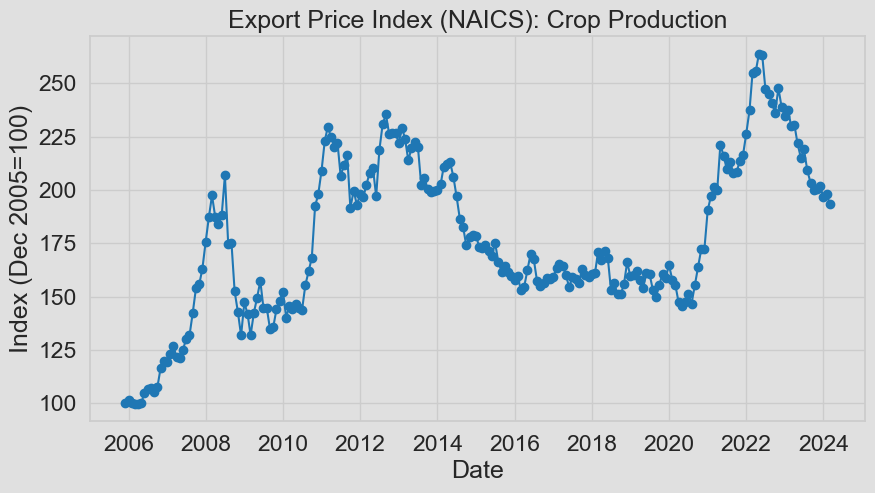

In [314]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['IY111'], marker='o', linestyle='-')
plt.title('Export Price Index (NAICS): Crop Production')
plt.xlabel('Date')
plt.ylabel('Index (Dec 2005=100)')
plt.grid(True)
plt.savefig('../image/cp.png')
plt.show()


Stationarity Check:
Most time series forecasting methods, including ARIMA, require the data to be stationary. This means the statistical properties like mean and variance should not be a function of time.

In [315]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['IY111'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -2.8508735104358633
p-value: 0.051366251861330134


If the p-value is less than 0.05, you can assume the series is stationary. If not, you might need to differenciate the series or transform it.

Step 4: Identifying ARIMA Parameters with ACF and PACF
Autocorrelation and partial autocorrelation plots help in identifying the potential parameters for the ARIMA model:

ACF: Helps to identify the Moving Average (MA) component, 
�
q.
PACF: Helps to identify the Autoregressive (AR) component, 
�
p.
Here’s how you can plot these to determine the ARIMA orders:

c:\Users\yzh20\Miniconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


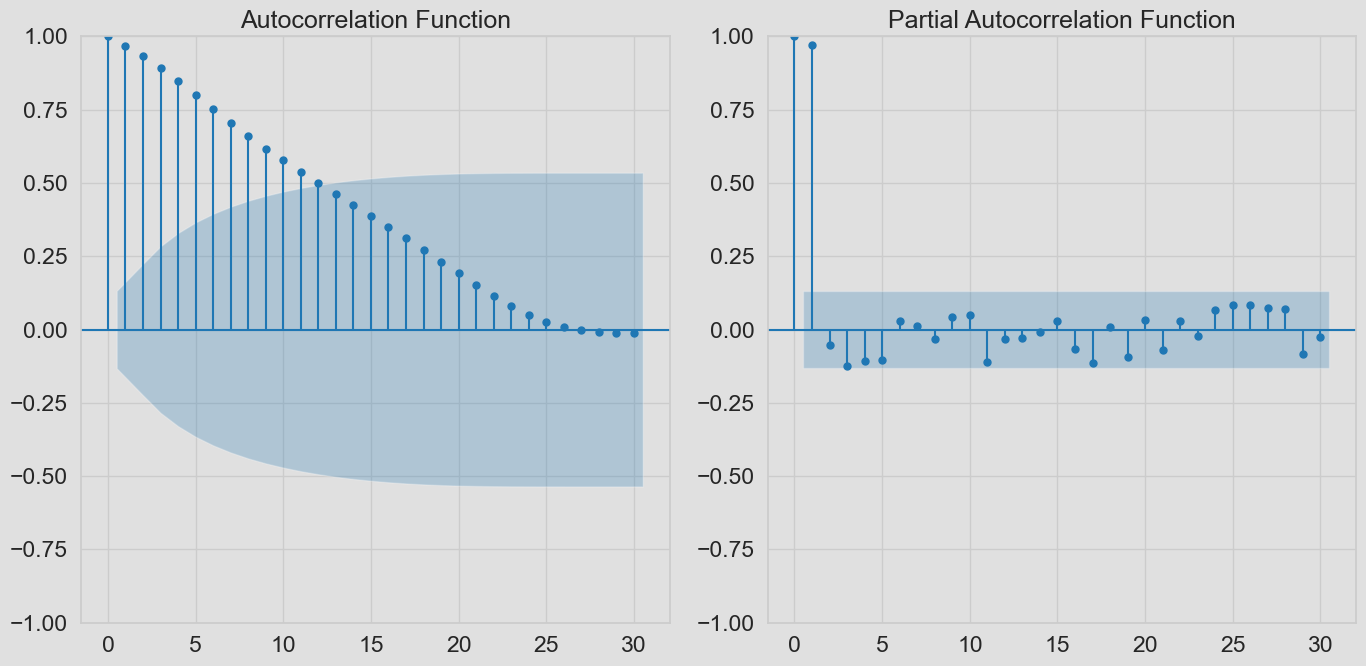

[codecarbon INFO @ 18:56:00] Energy consumed for RAM : 0.015116 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 18:56:00] Energy consumed for all GPUs : 0.042942 kWh. Total GPU Power : 16.1105794676429 W
[codecarbon INFO @ 18:56:00] Energy consumed for all CPUs : 0.058897 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 18:56:00] 0.116954 kWh of electricity used since the beginning.


In [316]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting ACF
plt.figure(figsize=(14, 7))
plt.subplot(121)
plot_acf(df['IY111'], ax=plt.gca(), lags=30)
plt.title('Autocorrelation Function')

# Plotting PACF
plt.subplot(122)
plot_pacf(df['IY111'], ax=plt.gca(), lags=30)
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()


c:\Users\yzh20\Miniconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


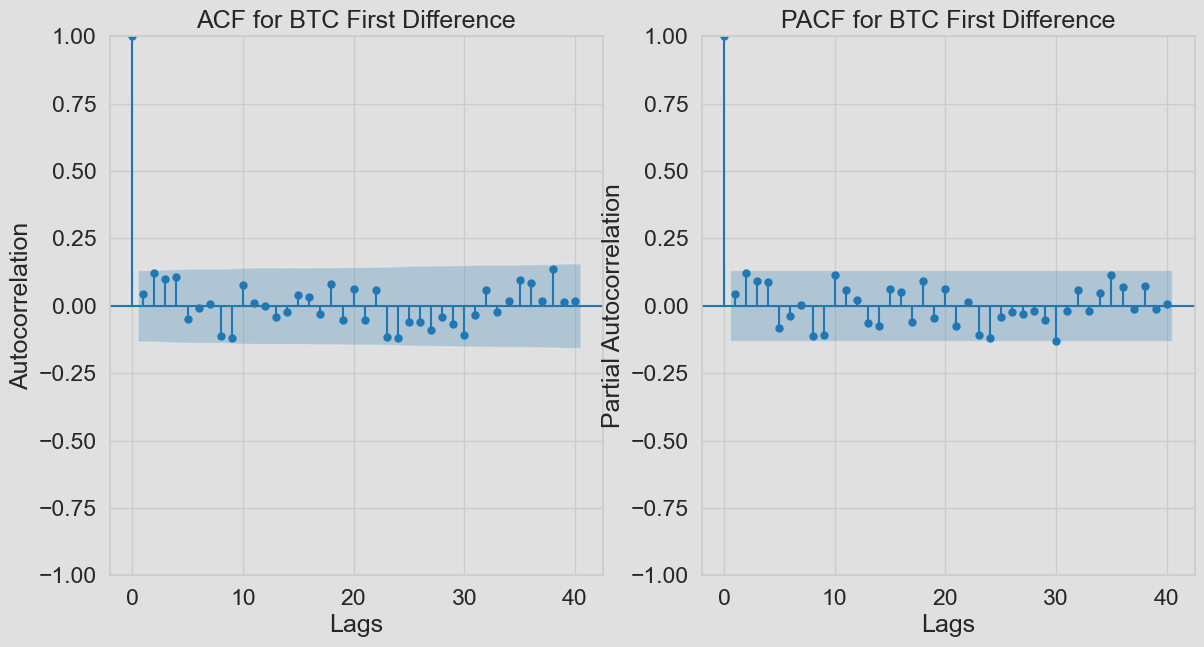

In [317]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Assume you have differenced the time series and stored it as `btc_first_difference`
# If not, replace `btc_first_difference` with the column you want to analyze
btc_first_difference = df['IY111'].diff().dropna()

# Plot ACF
plt.figure(figsize=(14, 7))
plt.subplot(121)
plot_acf(btc_first_difference, ax=plt.gca(), lags=40, title='ACF for BTC First Difference')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')

# Plot PACF
plt.subplot(122)
plot_pacf(btc_first_difference, ax=plt.gca(), lags=40, title='PACF for BTC First Difference')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')

plt.show()

In [145]:
!pip install pmdarima

Modeling - ARIMA/SARIMA:
Depending on whether your data exhibits seasonality, you might use ARIMA (if no seasonality) or SARIMA (if seasonality is present).


Step 5: Conduct Model Diagnostics
The output from results.summary() will include various statistics, including the AIC (Akaike Information Criterion), which helps in comparing models (the model with the lower AIC is generally better). Additionally, you should look at the diagnostics plots provided by the model:

[codecarbon INFO @ 18:56:06] [setup] RAM Tracking...
[codecarbon INFO @ 18:56:06] [setup] GPU Tracking...
[codecarbon INFO @ 18:56:06] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 18:56:06] [setup] CPU Tracking...
[codecarbon WARNING @ 18:56:06] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 18:56:08] CPU Model on constant consumption mode: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 18:56:08] >>> Tracker's metadata:
[codecarbon INFO @ 18:56:08]   Platform system: Windows-10-10.0.22631-SP0
[codecarbon INFO @ 18:56:08]   Python version: 3.9.13
[codecarbon INFO @ 18:56:08]   CodeCarbon version: 2.3.5
[codecarbon INFO @ 18:56:08]   Available RAM : 15.405 GB
[codecarbon INFO @ 18:56:08]   CPU count: 16
[codecarbon INFO @ 18:56:08]   CPU model: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 18:56:08]   GPU count: 1
[codecarbon INFO @ 18:56:08]   GPU model: 1 x NVIDIA GeForce RTX 3070 Laptop GPU
c:\Users\yzh20\Miniconda3\lib\

Estimated CO2 emissions for training ARIMA model: 8.66923176004224e-07 kg
                               SARIMAX Results                                
Dep. Variable:                  IY111   No. Observations:                  220
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -754.498
Date:                Sat, 20 Apr 2024   AIC                           1516.996
Time:                        18:56:11   BIC                           1530.552
Sample:                    12-01-2005   HQIC                          1522.471
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6075      0.231      2.628      0.009       0.154       1.061
ma.L1         -0.5903      0.237     -2.490      0.013   

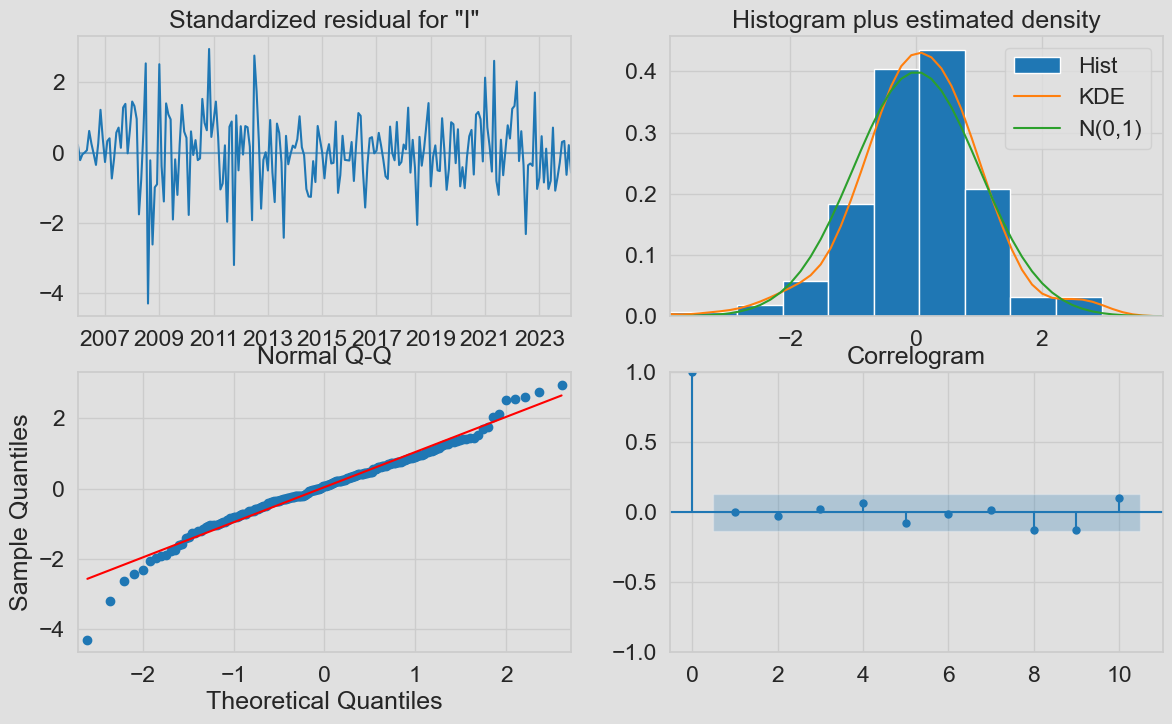

[codecarbon INFO @ 18:56:15] Energy consumed for RAM : 0.015140 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 18:56:15] Energy consumed for all GPUs : 0.043017 kWh. Total GPU Power : 18.132141193271494 W
[codecarbon INFO @ 18:56:15] Energy consumed for all CPUs : 0.058990 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 18:56:15] 0.117148 kWh of electricity used since the beginning.


In [318]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from codecarbon import EmissionsTracker

# Initialize the carbon emissions tracker
tracker = EmissionsTracker()

# Start tracking
tracker.start()

# Initial model based on guesses from ACF and PACF
model = ARIMA(df['IY111'], order=(1, 1, 2))  # Modify order as needed
results = model.fit()

# Stop tracking and collect emissions data
emissions = tracker.stop()
print(f"Estimated CO2 emissions for training ARIMA model: {emissions} kg")

# Summarize the model results
print(results.summary())

# Diagnostics plots
results.plot_diagnostics(figsize=(14, 8))
plt.show()


Standardized Residuals: The top-left plot shows the standardized residuals over time. You want this plot to look like "white noise" — displaying no obvious patterns or trends. In your plot, the residuals seem to hover around zero without clear patterns, which is a good sign.

Histogram plus Estimated Density: The top-right plot compares the distribution of the standardized residuals to a normal distribution. The orange line represents the KDE (Kernel Density Estimate) of the residuals, the green line is the normal distribution, and the blue bars are the histogram of the standardized residuals. Your residuals seem to be fairly normally distributed, with a slight deviation in the tails (the ends are slightly higher than the normal curve), indicating potential heavy-tailedness but not necessarily a major concern.

Normal Q-Q: The bottom-left plot is a Quantile-Quantile plot which compares the distribution of the standardized residuals to a theoretical normal distribution. The points should ideally lie on the red line. Most of your points lie on the line, but there's a slight deviation in the lower tail (left side), suggesting that the lower quantiles of your residuals have more extreme values than expected under a normal distribution. This can be a sign of heavy tails, which is consistent with the histogram.

Correlogram (ACF plot): The bottom-right plot is the correlogram, which displays the autocorrelation of the residuals at different lags. The blue area represents the confidence interval, typically set at 95%. Ideally, all autocorrelation coefficients should fall within this interval, which would suggest that there is no significant autocorrelation in the residuals. In your case, it looks like the residuals have low autocorrelation, which is good.

[codecarbon INFO @ 18:56:17] [setup] RAM Tracking...
[codecarbon INFO @ 18:56:17] [setup] GPU Tracking...
[codecarbon INFO @ 18:56:17] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 18:56:17] [setup] CPU Tracking...
[codecarbon WARNING @ 18:56:17] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 18:56:19] CPU Model on constant consumption mode: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 18:56:19] >>> Tracker's metadata:
[codecarbon INFO @ 18:56:19]   Platform system: Windows-10-10.0.22631-SP0
[codecarbon INFO @ 18:56:19]   Python version: 3.9.13
[codecarbon INFO @ 18:56:19]   CodeCarbon version: 2.3.5
[codecarbon INFO @ 18:56:19]   Available RAM : 15.405 GB
[codecarbon INFO @ 18:56:19]   CPU count: 16
[codecarbon INFO @ 18:56:19]   CPU model: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 18:56:19]   GPU count: 1
[codecarbon INFO @ 18:56:19]   GPU model: 1 x NVIDIA GeForce RTX 3070 Laptop GPU
c:\Users\yzh20\Miniconda3\lib\

Estimated CO2 emissions for training and forecasting with ARIMA model: 1.973323160143068e-07 kg


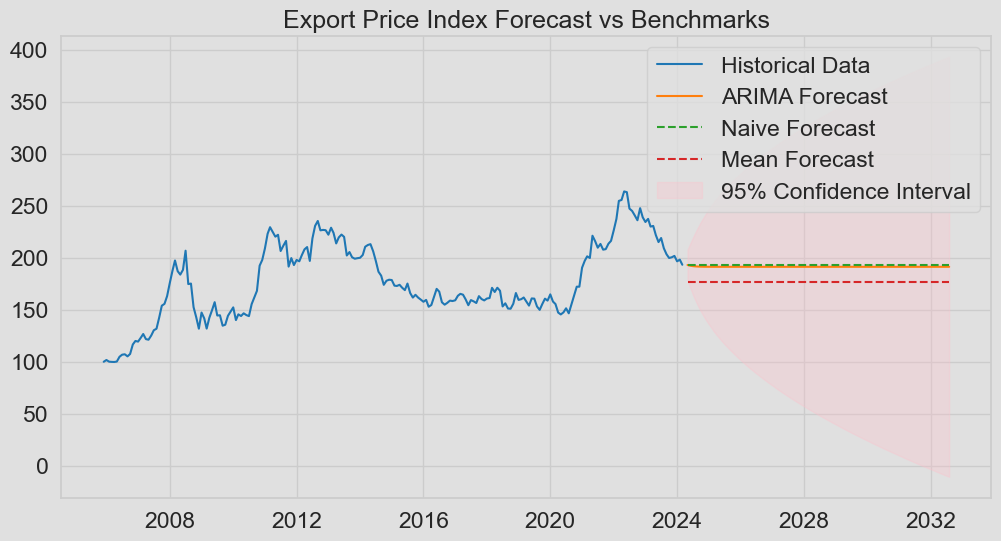

In [319]:
from statsmodels.tsa.arima.model import ARIMA
from codecarbon import EmissionsTracker
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Initialize the carbon emissions tracker
tracker = EmissionsTracker()

# Start tracking
tracker.start()

# Fit the ARIMA model
model = ARIMA(df['IY111'], order=(1, 1, 2))
results = model.fit()

# Forecast
n_periods = 100
forecast_results = results.get_forecast(steps=n_periods)
forecast = forecast_results.predicted_mean
stderr = forecast_results.se_mean
conf_int = forecast_results.conf_int()

# Stop tracking and collect emissions data
emissions = tracker.stop()
print(f"Estimated CO2 emissions for training and forecasting with ARIMA model: {emissions} kg")

# Create naive and mean forecasts for comparison
naive_forecast = np.full(n_periods, df['IY111'].iloc[-1])
mean_forecast = np.full(n_periods, df['IY111'].mean())

# Dates for plotting forecasts
forecast_dates = pd.date_range(df.index[-1], periods=n_periods + 1, freq='M')[1:]

# Plot the historical data, forecast, and benchmarks
plt.figure(figsize=(12, 6))
plt.plot(df['IY111'], label='Historical Data')
plt.plot(forecast_dates, forecast, label='ARIMA Forecast')
plt.plot(forecast_dates, naive_forecast, label='Naive Forecast', linestyle='--')
plt.plot(forecast_dates, mean_forecast, label='Mean Forecast', linestyle='--')
plt.fill_between(forecast_dates, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title('Export Price Index Forecast vs Benchmarks')
plt.legend()
plt.show()


In [320]:
import pmdarima as pm

# Apply first-order differencing 
df['IY111'] = df['IY111'].diff()


# Drop the NaN values created by differencing
pandas_df = df.dropna()


crypto_models = {}

# Running auto_arima
for crypto in ['IY111']:
    diff_series = pandas_df[crypto].dropna()
    model = pm.auto_arima(diff_series, start_p=1, start_q=1,
                          max_p=3, max_q=3,
                          m=1,
                          d=None,
                          seasonal=False,
                          start_P=0, 
                          D=0, 
                          trace=True,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=True)
    crypto_models[crypto] = model
    print(f'{crypto} best model: \n{model.summary()}')

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1517.638, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1517.125, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1518.651, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1518.742, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1518.452, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.152 seconds
IY111 best model: 
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  219
Model:                        SARIMAX   Log Likelihood                -757.563
Date:                Sat, 20 Apr 2024   AIC                           1517.125
Time:                        18:56:27   BIC                           1520.514
Sample:                    01-01-2006   HQIC                          1518.494
                         - 03-01-2024                    

[codecarbon INFO @ 18:56:30] Energy consumed for RAM : 0.015164 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 18:56:30] Energy consumed for all GPUs : 0.043096 kWh. Total GPU Power : 18.90993412752957 W
[codecarbon INFO @ 18:56:30] Energy consumed for all CPUs : 0.059084 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 18:56:30] 0.117344 kWh of electricity used since the beginning.


[codecarbon INFO @ 18:56:31] [setup] RAM Tracking...
[codecarbon INFO @ 18:56:31] [setup] GPU Tracking...
[codecarbon INFO @ 18:56:31] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 18:56:31] [setup] CPU Tracking...
[codecarbon WARNING @ 18:56:31] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 18:56:32] CPU Model on constant consumption mode: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 18:56:32] >>> Tracker's metadata:
[codecarbon INFO @ 18:56:32]   Platform system: Windows-10-10.0.22631-SP0
[codecarbon INFO @ 18:56:32]   Python version: 3.9.13
[codecarbon INFO @ 18:56:32]   CodeCarbon version: 2.3.5
[codecarbon INFO @ 18:56:32]   Available RAM : 15.405 GB
[codecarbon INFO @ 18:56:32]   CPU count: 16
[codecarbon INFO @ 18:56:32]   CPU model: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 18:56:32]   GPU count: 1
[codecarbon INFO @ 18:56:32]   GPU model: 1 x NVIDIA GeForce RTX 3070 Laptop GPU
c:\Users\yzh20\Miniconda3\lib\

Estimated CO2 emissions for ARIMA model fitting and forecasting: 1.6146463382519976e-07 kg
Test RMSE:  7.936231242141061


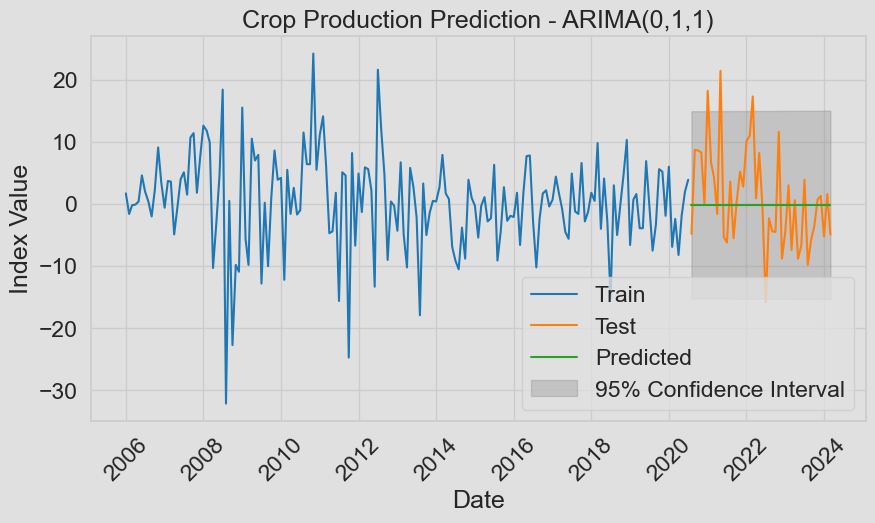

In [321]:
from statsmodels.tsa.arima.model import ARIMA
from codecarbon import EmissionsTracker
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Initialize the carbon emissions tracker
tracker = EmissionsTracker()

# Start tracking
tracker.start()

# Assuming pandas_df is defined earlier and has 'IY111' column
btc_prices = pandas_df['IY111']

# Splitting the data into training and testing sets
train_size = int(len(btc_prices) * 0.8)
train, test = btc_prices[0:train_size], btc_prices[train_size:]

# Fit the ARIMA model (assuming the order is found to be optimal)
model = ARIMA(train, order=(0,1,1))
model_fit3 = model.fit()

# Make predictions
predictions = model_fit3.get_forecast(steps=len(test))
predicted_mean = predictions.predicted_mean
predicted_conf_int = predictions.conf_int()
predicted_index = list(test.index)

# Stop tracking and collect emissions data
emissions = tracker.stop()
print(f"Estimated CO2 emissions for ARIMA model fitting and forecasting: {emissions} kg")

# Calculate the RMSE
rmse_011 = np.sqrt(mean_squared_error(test, predicted_mean))
print("Test RMSE: ", rmse_011)

# Plot the predictions along with the confidence interval
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predicted_index, predicted_mean, label='Predicted')
plt.fill_between(predicted_index, 
                 predicted_conf_int.iloc[:, 0], 
                 predicted_conf_int.iloc[:, 1], 
                 color='grey', alpha=0.3, label='95% Confidence Interval')
plt.title('Crop Production Prediction - ARIMA(0,1,1)')
plt.xlabel('Date')
plt.xticks(rotation=45) 
plt.ylabel('Index Value')
plt.legend()
plt.show()


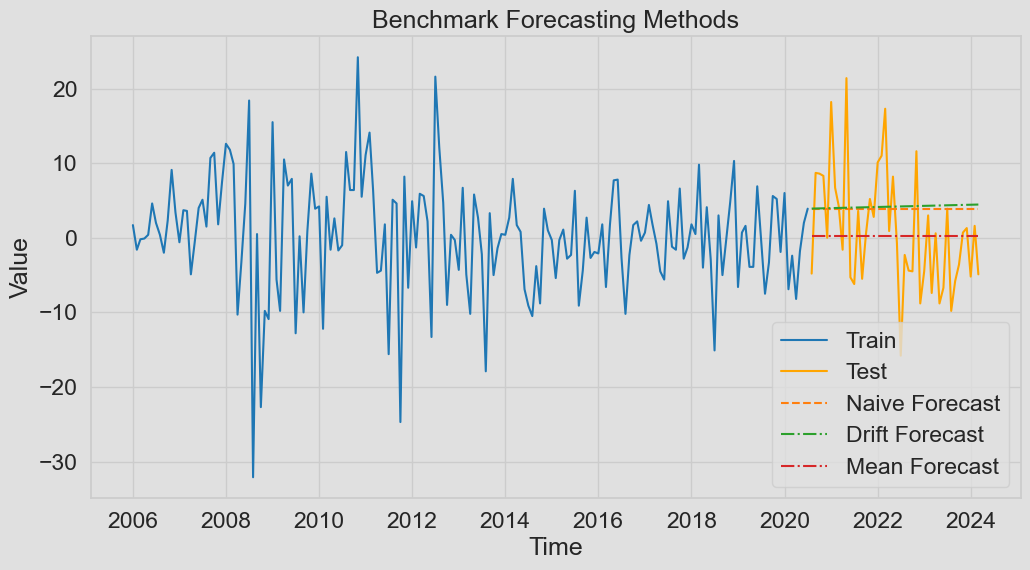

In [322]:
# Naive forecast
naive_forecast = np.full(shape=len(test), fill_value=train.iloc[-1])

# Drift method
trend = (train.iloc[-1] - train.iloc[0]) / (len(train) - 1)
drift_forecast = np.array([train.iloc[-1] + i * trend for i in range(1, len(test) + 1)])

# Mean forecast
mean_value = train.mean()
mean_forecast = np.full(shape=len(test), fill_value=mean_value)

# Creating a test index for plotting
test_index = np.arange(len(train), len(train) + len(test))

# Plot the forecasts
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(test.index, naive_forecast, label='Naive Forecast', linestyle='--')
plt.plot(test.index, drift_forecast, label='Drift Forecast', linestyle='-.')
plt.plot(test.index, mean_forecast, label='Mean Forecast', linestyle='-.')

plt.title('Benchmark Forecasting Methods')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [323]:
import numpy as np
import pandas as pd
import os
import random
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras import regularizers

# Setting seeds for reproducibility
random.seed(236)
np.random.seed(236)
tf.random.set_seed(236)

[codecarbon INFO @ 18:56:45] Energy consumed for RAM : 0.015188 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 18:56:45] Energy consumed for all GPUs : 0.043167 kWh. Total GPU Power : 16.967053671688593 W
[codecarbon INFO @ 18:56:45] Energy consumed for all CPUs : 0.059178 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 18:56:45] 0.117533 kWh of electricity used since the beginning.


In [324]:
df = pd.read_csv("../dataset/IY111.csv")

In [325]:
df.head()

,DATE,IY111
0,2005-12-01,100.0
1,2006-01-01,101.7
2,2006-02-01,100.1
3,2006-03-01,99.9
4,2006-04-01,99.8


In [326]:
df = df.rename(columns={"IY111": "y"}) # The objective
df = df[["DATE", "y"]]
X = np.array(df["y"].values.astype("float32")).reshape(df.shape[0], 1)

In [327]:
# Train and Test Split & Normalization

def train_test_split(data, split_percent=0.8):
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
   
    split = int(n * split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data


train_data, test_data, data = train_test_split(X)

print("train shape:", train_data.shape)
print("test shape:", test_data.shape)

train shape: (176,)
test shape: (44,)


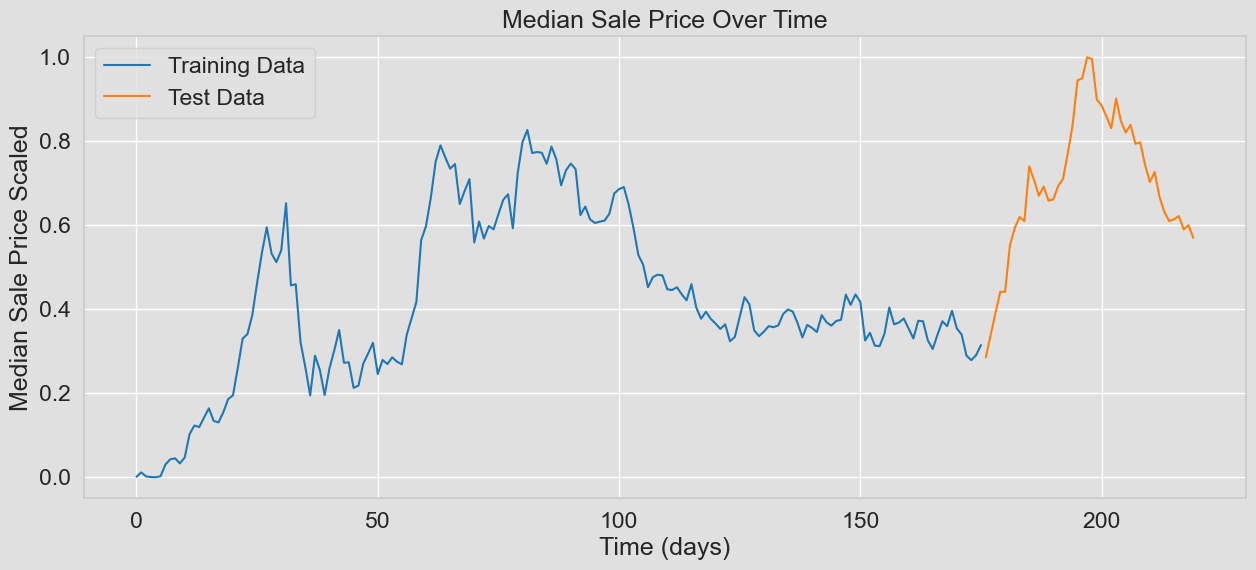

In [328]:
fig, ax = plt.subplots(figsize=(15, 6), dpi=100)  # Set the size and DPI of the figure
fig.patch.set_facecolor('#E0E0E0')  # Set the background color for the outer figure
ax.set_facecolor('#E0E0E0')  # Set the background color for the axes

# Plot the training data
ax.plot(range(0, len(train_data)), train_data, "-", label="Training Data")

# Plot the test data
ax.plot(range(len(train_data), len(train_data) + len(test_data)), test_data, "-", label="Test Data")

# Set labels and title
ax.set(xlabel="Time (days)", ylabel="Median Sale Price Scaled", title="Median Sale Price Over Time")

# Add grid with white color for better visibility on the gray background
ax.grid(color='white')

# Add legend to the plot
ax.legend()

# Show the plot
plt.show()


In [329]:
# PREPARE THE INPUT X AND TARGET Y
def get_XY(dat, time_steps, plot_data_partition=False):
    global X_ind, X, Y_ind, Y  # use for plotting later

    # INDICES OF TARGET ARRAY
    # Y_ind [  12   24   36   48 ..]; print(np.arange(1,12,1)); exit()
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    # print(Y_ind); exit()
    Y = dat[Y_ind]

    # PREPARE X
    rows_x = len(Y)
    X_ind = [*range(time_steps * rows_x)]
    del X_ind[::time_steps]  # if time_steps=10 remove every 10th entry
    X = dat[X_ind]

    # PLOT
    if plot_data_partition:
        plt.figure(figsize=(15, 6), dpi=80)
        plt.plot(Y_ind, Y, "o", X_ind, X, "-")
        plt.show()

    # RESHAPE INTO KERAS FORMAT
    X1 = np.reshape(X, (rows_x, time_steps - 1, 1))
    # print([*X_ind]); print(X1); print(X1.shape,Y.shape); exit()

    return X1, Y


# PARTITION DATA
p = 30  #
testX, testY = get_XY(test_data, p)
trainX, trainY = get_XY(train_data, p)

[codecarbon INFO @ 18:57:00] Energy consumed for RAM : 0.015212 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 18:57:00] Energy consumed for all GPUs : 0.043236 kWh. Total GPU Power : 16.541936432649138 W
[codecarbon INFO @ 18:57:00] Energy consumed for all CPUs : 0.059272 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 18:57:00] 0.117720 kWh of electricity used since the beginning.


In [330]:
 #USER PARAM
recurrent_hidden_units = 3
epochs = 200
f_batch = 0.2  # fraction used for batch size
optimizer = "RMSprop"
validation_split = 0.2
# trainY=trainY.reshape(trainY.shape[0],1)
# testY=testY.reshape(testY.shape[0],1)
print("Testing Array Shape:", testX.shape, testY.shape)
print("Training Array Shape:", trainX.shape, trainY.shape)

Testing Array Shape: (1, 29, 1) (1,)
Training Array Shape: (5, 29, 1) (5,)


[codecarbon INFO @ 18:57:04] [setup] RAM Tracking...
[codecarbon INFO @ 18:57:04] [setup] GPU Tracking...
[codecarbon INFO @ 18:57:04] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 18:57:04] [setup] CPU Tracking...
[codecarbon WARNING @ 18:57:04] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 18:57:06] CPU Model on constant consumption mode: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 18:57:06] >>> Tracker's metadata:
[codecarbon INFO @ 18:57:06]   Platform system: Windows-10-10.0.22631-SP0
[codecarbon INFO @ 18:57:06]   Python version: 3.9.13
[codecarbon INFO @ 18:57:06]   CodeCarbon version: 2.3.5
[codecarbon INFO @ 18:57:06]   Available RAM : 15.405 GB
[codecarbon INFO @ 18:57:06]   CPU count: 16
[codecarbon INFO @ 18:57:06]   CPU model: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 18:57:06]   GPU count: 1
[codecarbon INFO @ 18:57:06]   GPU model: 1 x NVIDIA GeForce RTX 3070 Laptop GPU


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 3)                 60        
                                                                 
 dense_6 (Dense)             (None, 1)                 4         
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


[codecarbon INFO @ 18:57:15] Energy consumed for RAM : 0.015236 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 18:57:15] Energy consumed for all GPUs : 0.043309 kWh. Total GPU Power : 17.58999272755751 W
[codecarbon INFO @ 18:57:15] Energy consumed for all CPUs : 0.059366 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 18:57:15] 0.117911 kWh of electricity used since the beginning.
[codecarbon INFO @ 18:57:20] Energy consumed for RAM : 0.000018 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 18:57:20] Energy consumed for all GPUs : 0.000055 kWh. Total GPU Power : 17.408753307051633 W
[codecarbon INFO @ 18:57:20] Energy consumed for all CPUs : 0.000071 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 18:57:20] 0.000144 kWh of electricity used since the beginning.


Estimated CO2 emissions for training the LSTM model: 5.3317272404635156e-05 kg
1/1 [==============================] - 0s 12ms/step


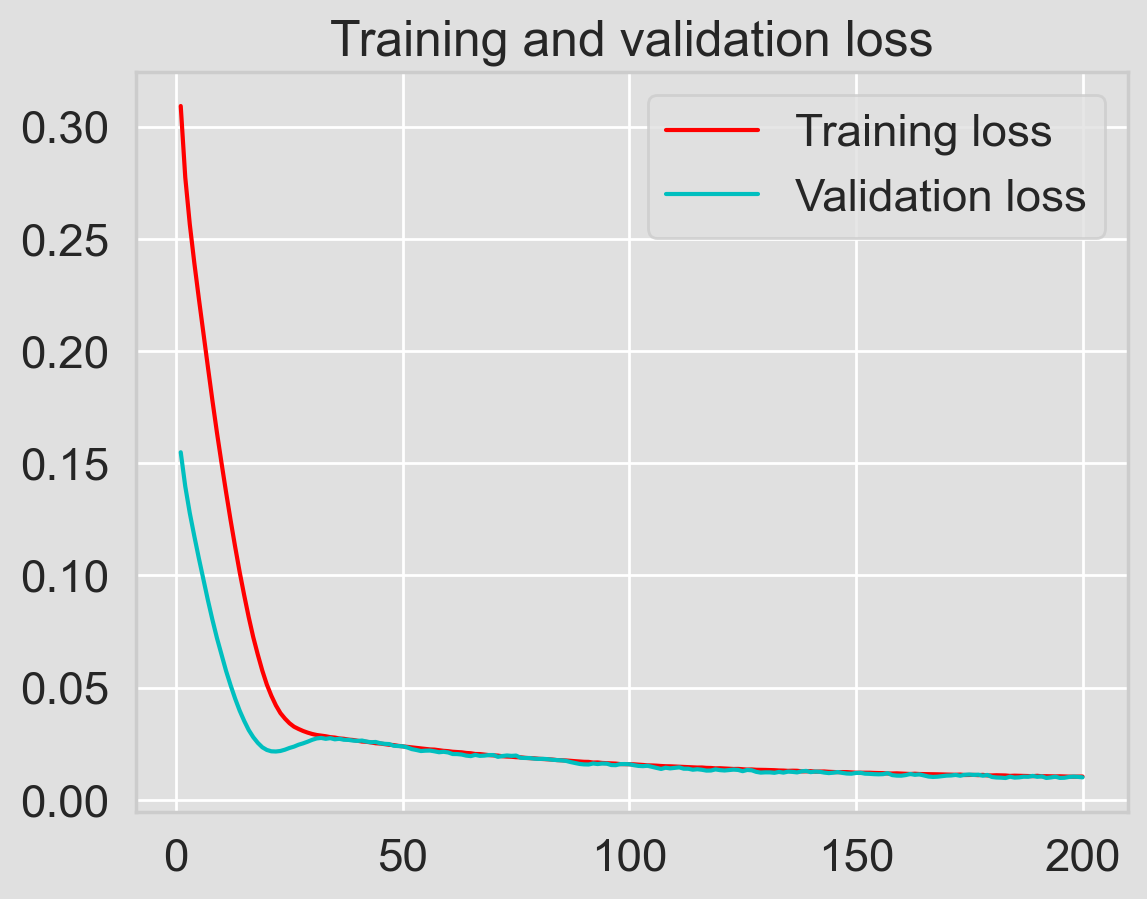

In [331]:
random.seed(236)
# Initialize the carbon emissions tracker
tracker = EmissionsTracker()

# Start tracking
tracker.start()

# CREATE MODEL
model = Sequential()
model.add(
    LSTM(
        recurrent_hidden_units,
        return_sequences=False,
        input_shape=(trainX.shape[1], trainX.shape[2]),
        recurrent_regularizer=regularizers.L2(1e-2),
        activation="tanh",
    )
)

# NEED TO TAKE THE OUTPUT RNN AND CONVERT TO SCALAR
model.add(Dense(units=1, activation="linear"))

# COMPILE THE MODEL
model.compile(loss="MeanSquaredError", optimizer=optimizer)
model.summary()

# TRAIN MODEL
history = model.fit(
    trainX,
    trainY,
    epochs=200,
    batch_size=int(f_batch * trainX.shape[0]),
    validation_split=validation_split,
    verbose=0,
)

# Stop tracking and collect emissions data
emissions = tracker.stop()
print(f"Estimated CO2 emissions for training the LSTM model: {emissions} kg")

# MAKE PREDICTIONS
train_predict = model.predict(trainX).squeeze()
test_predict = model.predict(testX).squeeze()

# Plotting
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure(facecolor='#E0E0E0', dpi=200)  # Set the background color and DPI
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'c', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.gca().set_facecolor('#E0E0E0')  # Set the axes background color
plt.grid(color='white')  # Set the grid color to white for better visibility on the gray background
plt.show()


In [190]:
# Make predictions
train_predict = model.predict(trainX).flatten()
test_predict = model.predict(testX).flatten()  # Flattening to ensure it is a 1D array

# Now, print the shapes to verify
print("Shape of test_predict after flattening:", test_predict.shape)

# Compute RMSE
train_rmse = np.sqrt(mean_squared_error(trainY, train_predict))
test_rmse = np.sqrt(mean_squared_error(testY, test_predict))

# Print MSE and RMSE
print("Train MSE = %.5f RMSE = %.5f" % (np.mean((trainY - train_predict) ** 2.0), train_rmse))
print("Test MSE = %.5f RMSE = %.5f" % (np.mean((testY - test_predict) ** 2.0), test_rmse))


1/1 [==============================] - 0s 16ms/step
Shape of test_predict after flattening: (1,)
Train MSE = 0.00788 RMSE = 0.08876
Test MSE = 0.01182 RMSE = 0.10870


(145,) (5,)


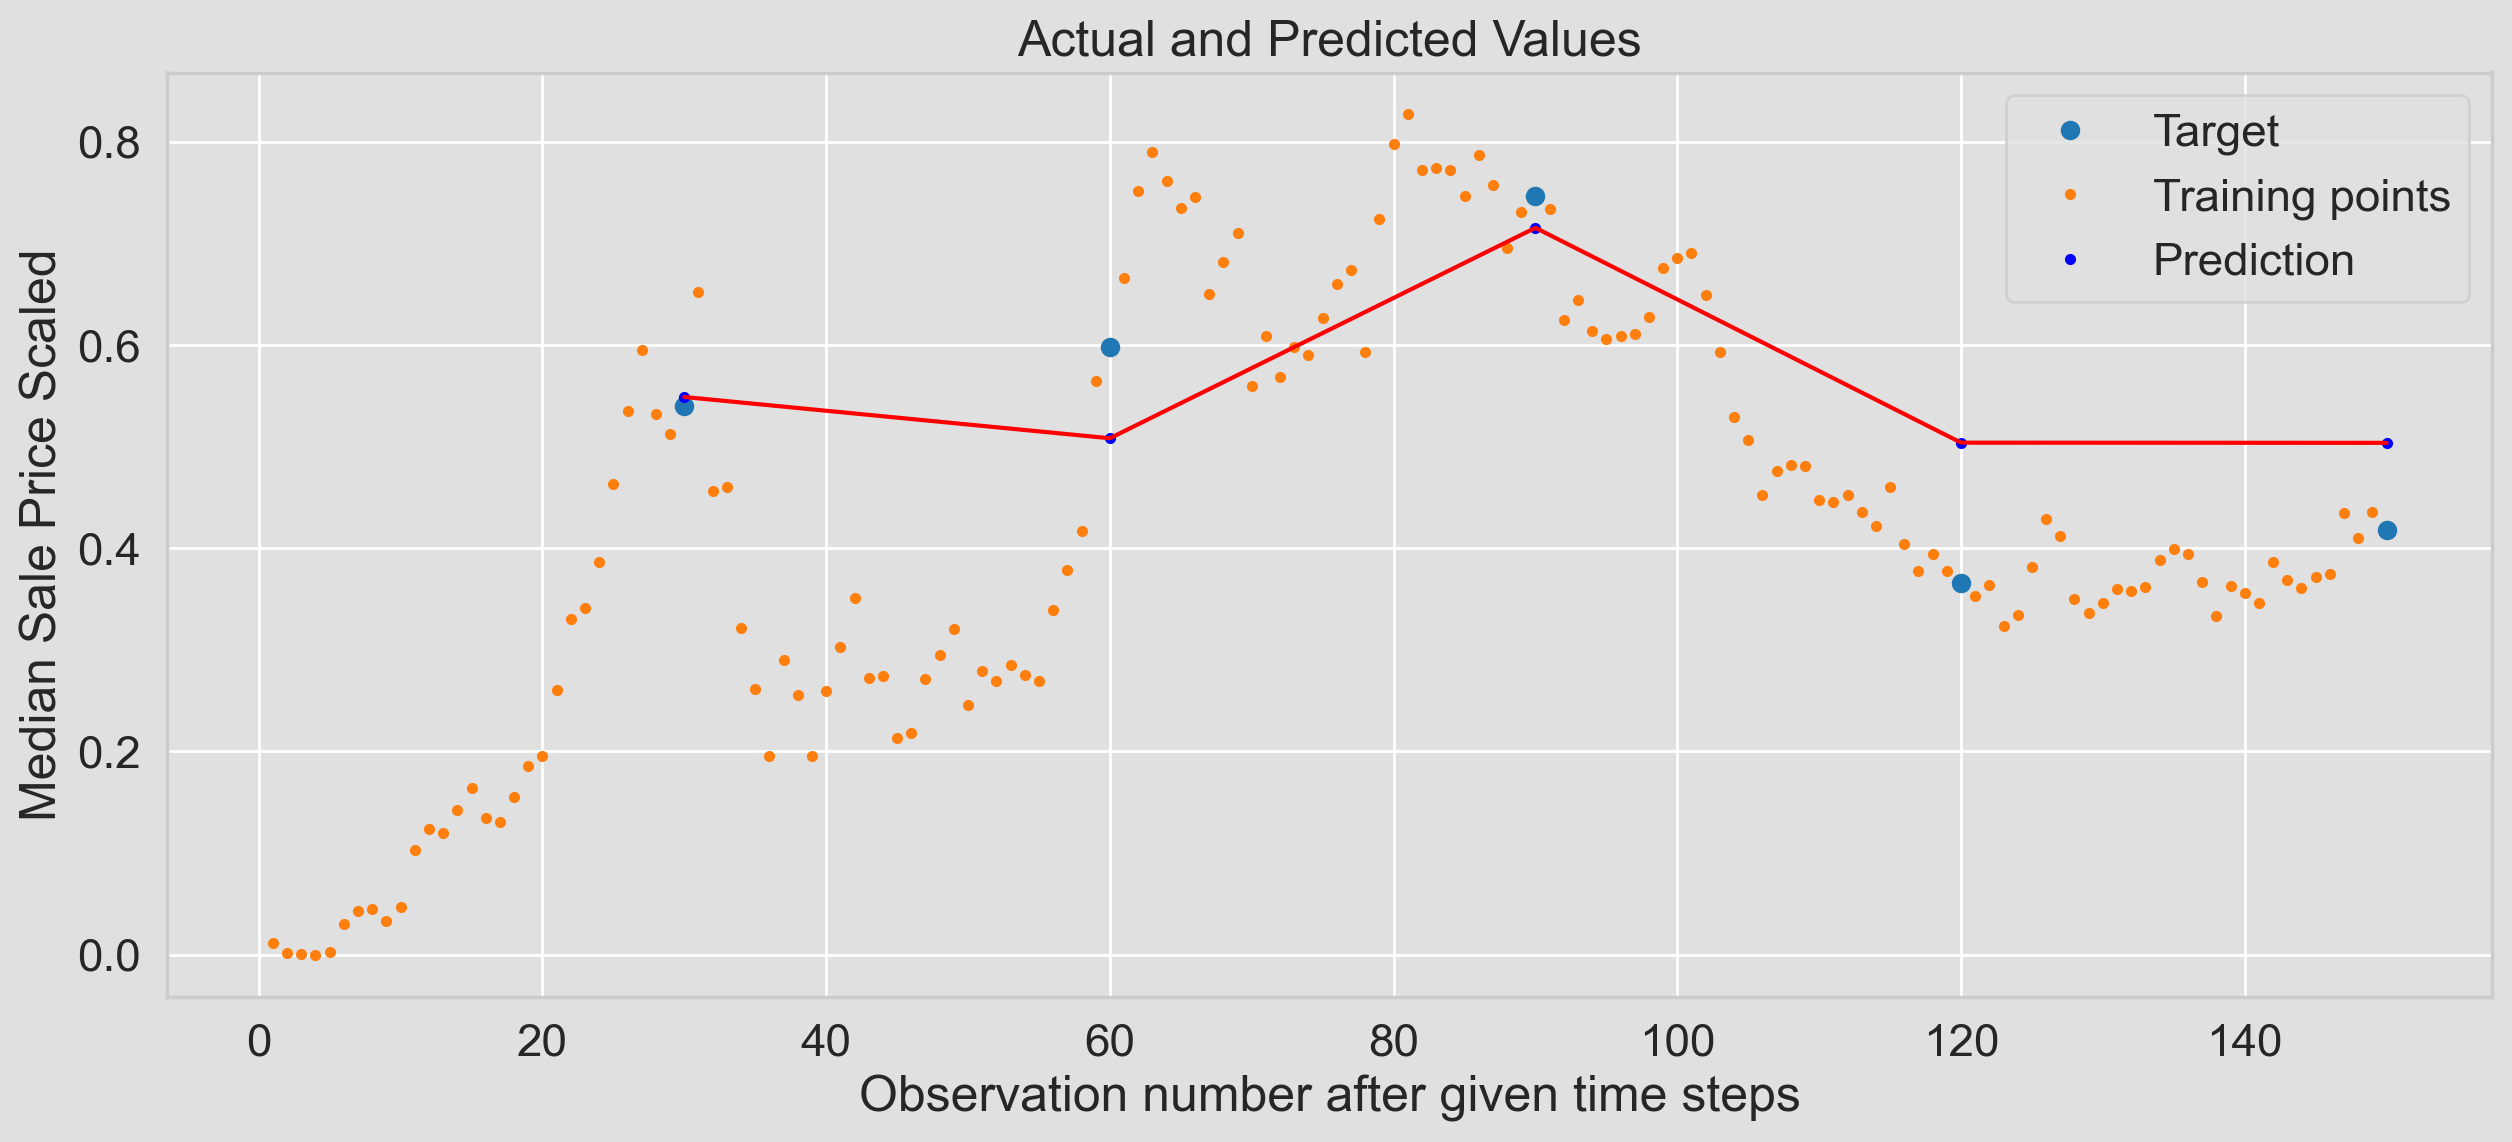

[codecarbon INFO @ 18:57:30] Energy consumed for RAM : 0.015260 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 18:57:30] Energy consumed for all GPUs : 0.043378 kWh. Total GPU Power : 16.579715163067693 W
[codecarbon INFO @ 18:57:30] Energy consumed for all CPUs : 0.059459 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 18:57:30] 0.118098 kWh of electricity used since the beginning.
[codecarbon INFO @ 18:57:45] Energy consumed for RAM : 0.015284 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 18:57:45] Energy consumed for all GPUs : 0.043446 kWh. Total GPU Power : 16.136771659945158 W
[codecarbon INFO @ 18:57:45] Energy consumed for all CPUs : 0.059553 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 18:57:45] 0.118283 kWh of electricity used since the beginning.
[codecarbon INFO @ 18:58:00] Energy consumed for RAM : 0.015308 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 18:58:00] Energy consumed for all GPUs : 0.043511 kWh. Total GPU Power : 15.744847057680

In [332]:

def plot_result(trainY, testY, train_predict, test_predict):
    plt.figure(figsize=(15, 6), dpi=200, facecolor='#E0E0E0')  # Set higher DPI and background color for the figure
    plt.gca().set_facecolor('#E0E0E0')  # Set the axes background color
    # ORIGINAL DATA
    print(X.shape, Y.shape)
    plt.plot(Y_ind, Y, "o", label="Target")
    plt.plot(X_ind, X, ".", label="Training points")
    plt.plot(Y_ind, train_predict, "b.", label="Prediction")
    plt.plot(Y_ind, train_predict, "r-")
    plt.legend()
    plt.xlabel("Observation number after given time steps")
    plt.ylabel("Median Sale Price Scaled")
    plt.title("Actual and Predicted Values")
    plt.grid(color='white')  # Set grid color to white for better visibility
    plt.show()


plot_result(trainY, testY, train_predict, test_predict)

[codecarbon INFO @ 16:20:49] [setup] RAM Tracking...
[codecarbon INFO @ 16:20:49] [setup] GPU Tracking...
[codecarbon INFO @ 16:20:49] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 16:20:49] [setup] CPU Tracking...
[codecarbon WARNING @ 16:20:49] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:20:50] CPU Model on constant consumption mode: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 16:20:50] >>> Tracker's metadata:
[codecarbon INFO @ 16:20:50]   Platform system: Windows-10-10.0.22631-SP0
[codecarbon INFO @ 16:20:50]   Python version: 3.9.13
[codecarbon INFO @ 16:20:50]   CodeCarbon version: 2.3.5
[codecarbon INFO @ 16:20:50]   Available RAM : 15.405 GB
[codecarbon INFO @ 16:20:50]   CPU count: 16
[codecarbon INFO @ 16:20:50]   CPU model: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 16:20:50]   GPU count: 1
[codecarbon INFO @ 16:20:50]   GPU model: 1 x NVIDIA GeForce RTX 3070 Laptop GPU


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 15        
                                                                 
 dense_4 (Dense)             (None, 1)                 4         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


[codecarbon INFO @ 16:20:55] Energy consumed for RAM : 0.000193 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 16:20:55] Energy consumed for all GPUs : 0.000536 kWh. Total GPU Power : 18.378541040681476 W
[codecarbon INFO @ 16:20:55] Energy consumed for all CPUs : 0.000750 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:20:55] 0.001479 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:21:01] Energy consumed for RAM : 0.000013 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 16:21:01] Energy consumed for all GPUs : 0.000037 kWh. Total GPU Power : 16.701556820437514 W
[codecarbon INFO @ 16:21:01] Energy consumed for all CPUs : 0.000049 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:21:01] 0.000099 kWh of electricity used since the beginning.


Estimated CO2 emissions for training the RNN model: 2.080604616043634e-05 kg
1/1 [==============================] - 0s 22ms/step


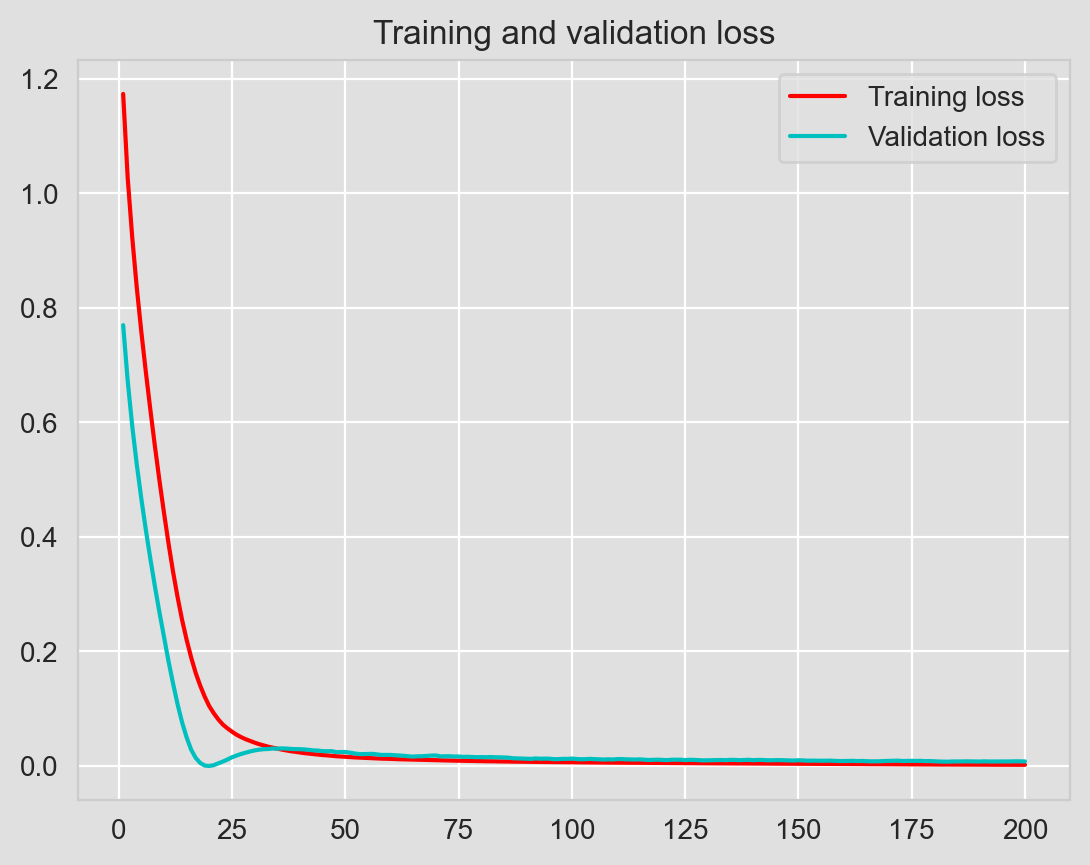

1/1 [==============================] - 0s 25ms/step
Shape of test_predict after flattening: (1,)
Train MSE = 0.00300 RMSE = 0.05475
Test MSE = 0.00914 RMSE = 0.09561
(145,) (5,)


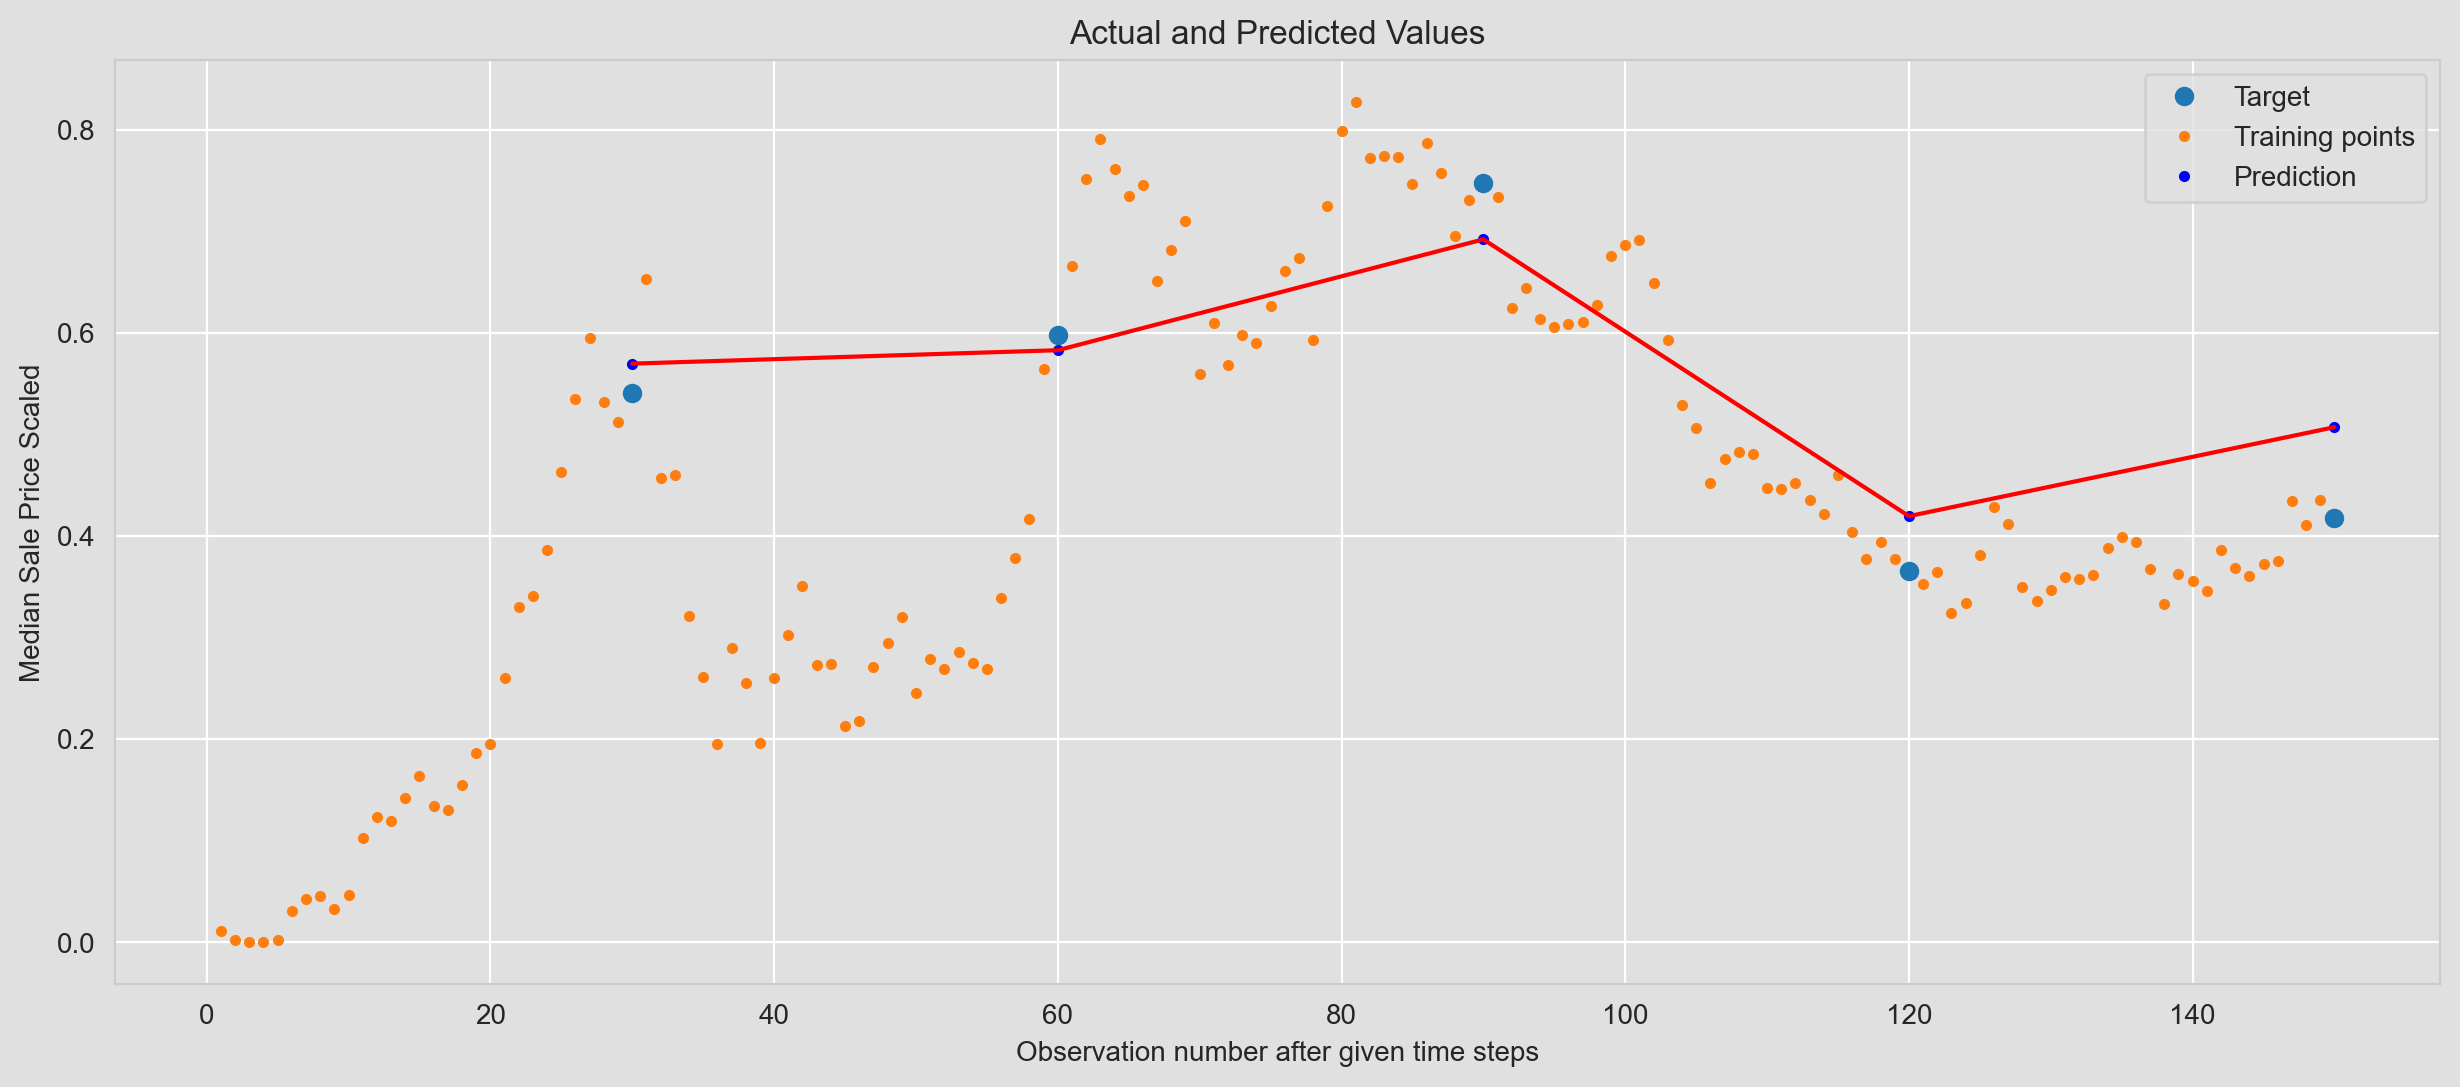

[codecarbon INFO @ 16:21:10] Energy consumed for RAM : 0.000217 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 16:21:10] Energy consumed for all GPUs : 0.000604 kWh. Total GPU Power : 16.488034954819792 W
[codecarbon INFO @ 16:21:10] Energy consumed for all CPUs : 0.000844 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:21:10] 0.001665 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:21:25] Energy consumed for RAM : 0.000241 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 16:21:25] Energy consumed for all GPUs : 0.000668 kWh. Total GPU Power : 15.359535148673103 W
[codecarbon INFO @ 16:21:25] Energy consumed for all CPUs : 0.000938 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:21:25] 0.001847 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:21:40] Energy consumed for RAM : 0.000265 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 16:21:40] Energy consumed for all GPUs : 0.000736 kWh. Total GPU Power : 16.188681933596

In [195]:
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN, GRU
# TRAIN MODEL
np.random.seed(236)
tf.random.set_seed(236)

# Initialize the carbon emissions tracker
tracker = EmissionsTracker()

# Start tracking
tracker.start()

# CREATE MODEL
model = Sequential()
# COMMENT/UNCOMMENT TO USE RNN, LSTM,GRU
model.add(
    SimpleRNN(
        # model.add(GRU(
        recurrent_hidden_units,
        return_sequences=False,
        input_shape=(trainX.shape[1], trainX.shape[2]),
     
        activation="tanh",
    )
)

# NEED TO TAKE THE OUTPUT RNN AND CONVERT TO SCALAR
model.add(Dense(units=1, activation="linear"))

# COMPILE THE MODEL
model.compile(loss="MeanSquaredError", optimizer=optimizer)
model.summary()
history = model.fit(
    trainX,
    trainY,
    epochs=200,
    batch_size=int(f_batch * trainX.shape[0]),
    validation_split=validation_split,
    verbose=0,
)
# Stop tracking and collect emissions data
emissions = tracker.stop()
print(f"Estimated CO2 emissions for training the RNN model: {emissions} kg")
# MAKE PREDICTIONS
train_predict = model.predict(trainX).squeeze()
test_predict = model.predict(testX).squeeze()


import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure(facecolor='#E0E0E0', dpi=200)  # Set the background color and DPI
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'c', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.gca().set_facecolor('#E0E0E0')  # Set the axes background color
plt.grid(color='white')  # Set the grid color to white for better visibility on the gray background
plt.show()


# Make predictions
train_predict = model.predict(trainX).flatten()
test_predict = model.predict(testX).flatten()  # Flattening to ensure it is a 1D array

# Now, print the shapes to verify
print("Shape of test_predict after flattening:", test_predict.shape)

# Compute RMSE
train_rmse = np.sqrt(mean_squared_error(trainY, train_predict))
test_rmse = np.sqrt(mean_squared_error(testY, test_predict))

# Print MSE and RMSE
print("Train MSE = %.5f RMSE = %.5f" % (np.mean((trainY - train_predict) ** 2.0), train_rmse))
print("Test MSE = %.5f RMSE = %.5f" % (np.mean((testY - test_predict) ** 2.0), test_rmse))


plot_result(trainY, testY, train_predict, test_predict)


[codecarbon INFO @ 16:22:46] [setup] RAM Tracking...
[codecarbon INFO @ 16:22:46] [setup] GPU Tracking...
[codecarbon INFO @ 16:22:46] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 16:22:46] [setup] CPU Tracking...
[codecarbon WARNING @ 16:22:46] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:22:48] CPU Model on constant consumption mode: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 16:22:48] >>> Tracker's metadata:
[codecarbon INFO @ 16:22:48]   Platform system: Windows-10-10.0.22631-SP0
[codecarbon INFO @ 16:22:48]   Python version: 3.9.13
[codecarbon INFO @ 16:22:48]   CodeCarbon version: 2.3.5
[codecarbon INFO @ 16:22:48]   Available RAM : 15.405 GB
[codecarbon INFO @ 16:22:48]   CPU count: 16
[codecarbon INFO @ 16:22:48]   CPU model: AMD Ryzen 9 5900HX with Radeon Graphics
[codecarbon INFO @ 16:22:48]   GPU count: 1
[codecarbon INFO @ 16:22:48]   GPU model: 1 x NVIDIA GeForce RTX 3070 Laptop GPU


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 3)                 54        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


[codecarbon INFO @ 16:22:55] Energy consumed for RAM : 0.000385 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 16:22:55] Energy consumed for all GPUs : 0.001074 kWh. Total GPU Power : 17.37016352002242 W
[codecarbon INFO @ 16:22:55] Energy consumed for all CPUs : 0.001501 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:22:55] 0.002960 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:23:02] Energy consumed for RAM : 0.000019 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 16:23:02] Energy consumed for all GPUs : 0.000057 kWh. Total GPU Power : 17.717272807584273 W
[codecarbon INFO @ 16:23:02] Energy consumed for all CPUs : 0.000073 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:23:02] 0.000148 kWh of electricity used since the beginning.


Estimated CO2 emissions for training the GRU model: 3.1232980250948726e-05 kg
1/1 [==============================] - 0s 24ms/step


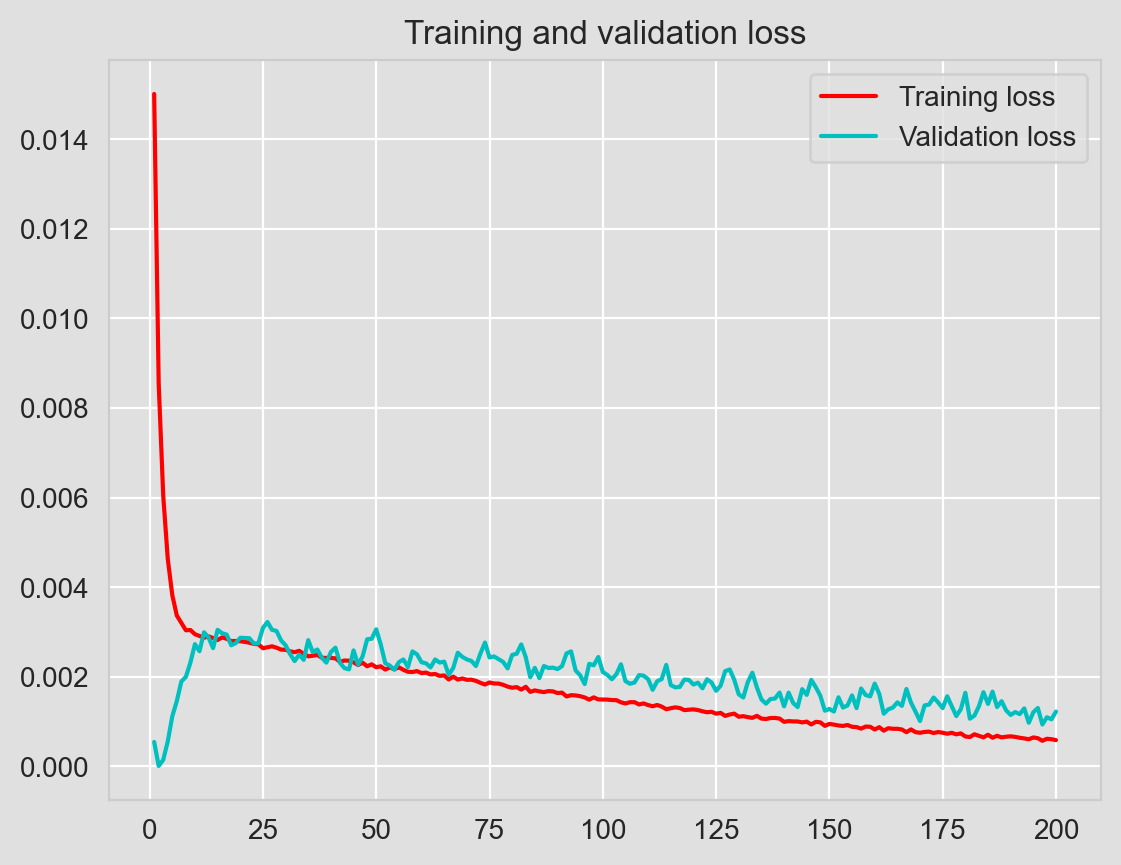

1/1 [==============================] - 0s 24ms/step
Shape of test_predict after flattening: (1,)
Train MSE = 0.00062 RMSE = 0.02491
Test MSE = 0.00004 RMSE = 0.00645
(145,) (5,)


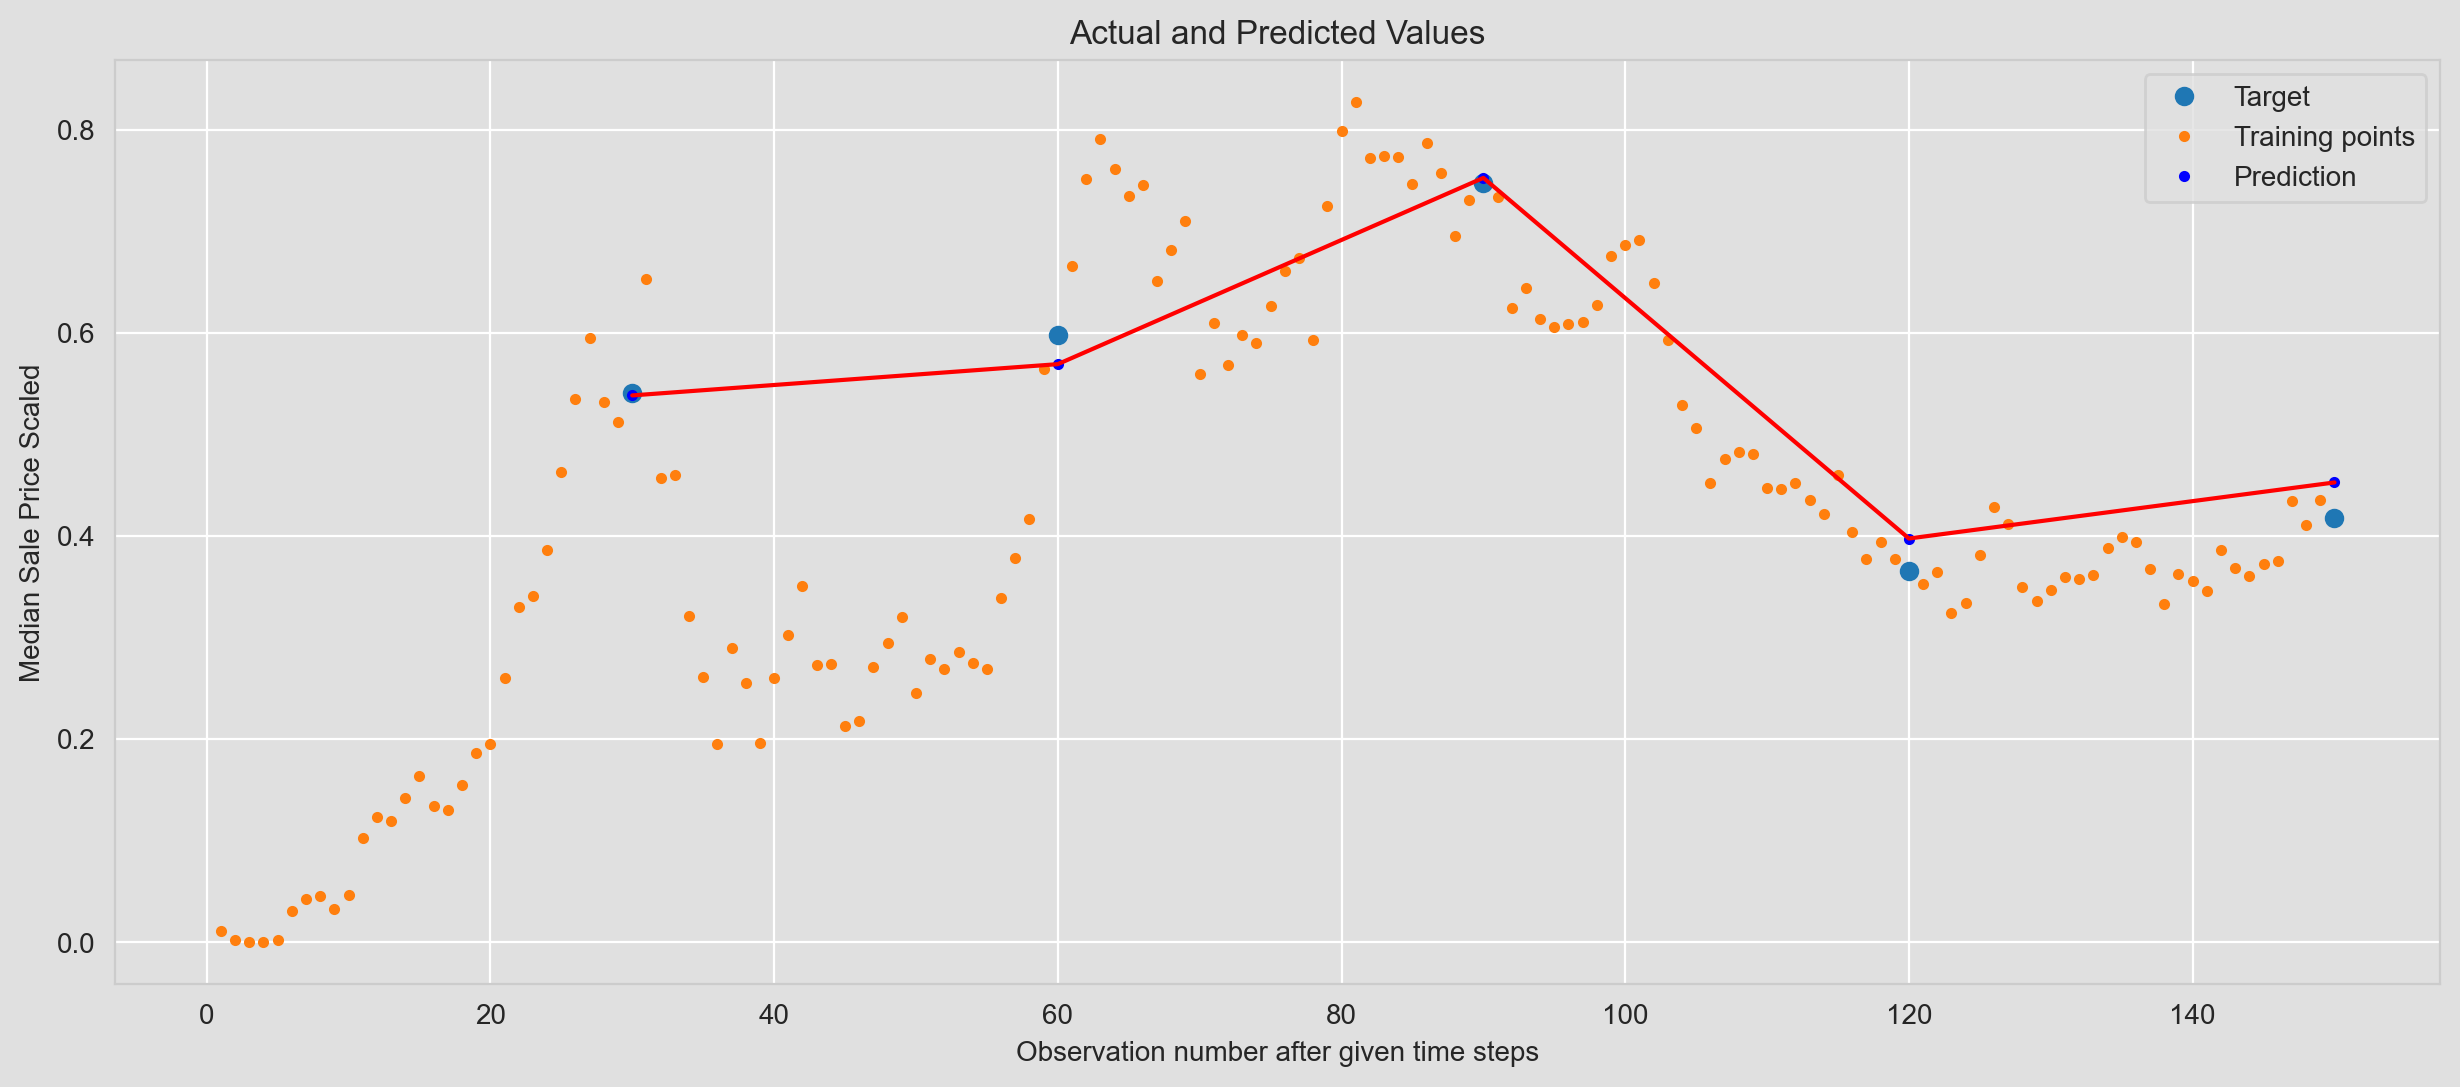

[codecarbon INFO @ 16:23:10] Energy consumed for RAM : 0.000409 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 16:23:10] Energy consumed for all GPUs : 0.001145 kWh. Total GPU Power : 17.00151871612965 W
[codecarbon INFO @ 16:23:10] Energy consumed for all CPUs : 0.001595 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:23:10] 0.003149 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:23:25] Energy consumed for RAM : 0.000433 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 16:23:25] Energy consumed for all GPUs : 0.001209 kWh. Total GPU Power : 15.374658981225231 W
[codecarbon INFO @ 16:23:25] Energy consumed for all CPUs : 0.001688 kWh. Total CPU Power : 22.5 W
[codecarbon INFO @ 16:23:25] 0.003331 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:23:40] Energy consumed for RAM : 0.000457 kWh. RAM Power : 5.776828765869141 W
[codecarbon INFO @ 16:23:40] Energy consumed for all GPUs : 0.001278 kWh. Total GPU Power : 16.6285342512124

In [196]:
# TRAIN MODEL
np.random.seed(42)
tf.random.set_seed(42)
# CREATE MODEL
# Initialize the carbon emissions tracker
tracker = EmissionsTracker()

# Start tracking
tracker.start()

model = Sequential()
# COMMENT/UNCOMMENT TO USE RNN, LSTM,GRU
model.add(
    GRU(
        recurrent_hidden_units,
        return_sequences=False,
        input_shape=(trainX.shape[1], trainX.shape[2]),
      
        activation="tanh",
    )
)

# NEED TO TAKE THE OUTPUT RNN AND CONVERT TO SCALAR
model.add(Dense(units=1, activation="linear"))

# COMPILE THE MODEL
model.compile(loss="MeanSquaredError", optimizer=optimizer)
model.summary()

history = model.fit(
    trainX,
    trainY,
    epochs=200,
    batch_size=int(f_batch * trainX.shape[0]),
    validation_split=validation_split,
    verbose=0,
)
# Stop tracking and collect emissions data
emissions = tracker.stop()
print(f"Estimated CO2 emissions for training the GRU model: {emissions} kg")
# MAKE PREDICTIONS
train_predict = model.predict(trainX).squeeze()
test_predict = model.predict(testX).squeeze()


import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure(facecolor='#E0E0E0', dpi=200)  # Set the background color and DPI
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'c', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.gca().set_facecolor('#E0E0E0')  # Set the axes background color
plt.grid(color='white')  # Set the grid color to white for better visibility on the gray background
plt.show()


# Make predictions
train_predict = model.predict(trainX).flatten()
test_predict = model.predict(testX).flatten()  # Flattening to ensure it is a 1D array

# Now, print the shapes to verify
print("Shape of test_predict after flattening:", test_predict.shape)

# Compute RMSE
train_rmse = np.sqrt(mean_squared_error(trainY, train_predict))
test_rmse = np.sqrt(mean_squared_error(testY, test_predict))

# Print MSE and RMSE
print("Train MSE = %.5f RMSE = %.5f" % (np.mean((trainY - train_predict) ** 2.0), train_rmse))
print("Test MSE = %.5f RMSE = %.5f" % (np.mean((testY - test_predict) ** 2.0), test_rmse))


# PLOT THE RESULT
def plot_result(trainY, testY, train_predict, test_predict):
    plt.figure(figsize=(15, 6), dpi=200, facecolor='#E0E0E0')  # Set higher DPI and background color for the figure
    plt.gca().set_facecolor('#E0E0E0')  # Set the axes background color
    # ORIGINAL DATA
    print(X.shape, Y.shape)
    plt.plot(Y_ind, Y, "o", label="Target")
    plt.plot(X_ind, X, ".", label="Training points")
    plt.plot(Y_ind, train_predict, "b.", label="Prediction")
    plt.plot(Y_ind, train_predict, "r-")
    plt.legend()
    plt.xlabel("Observation number after given time steps")
    plt.ylabel("Median Sale Price Scaled")
    plt.title("Actual and Predicted Values")
    plt.grid(color='white')  # Set grid color to white for better visibility
    plt.show()

# Call the function with your data
plot_result(trainY, testY, train_predict, test_predict)
